Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-11-26"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [2]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-11-26"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [3]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [4]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-26  Afghanistan_nan         0         210.0         784.0   
1  2020-11-26      Albania_nan         0         644.0        2183.0   
2  2020-11-26      Algeria_nan         0        1025.0        3163.0   
3  2020-11-26      Andorra_nan         0          77.0         172.0   
4  2020-11-26       Angola_nan         0          79.0         328.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1639.0              45490.0               45707.0  35530000.0   
1        5107.0              34944.0               35714.0   2878445.0   
2        7396.0              78025.0               79088.0  41320000.0   
3         410.0               6428.0                6478.0     77239.0   
4         899.0              14821.0               14981.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001280   
1                                       0.012140   
2                                       0.001888   
3                                       0.083234   
4                                       0.000451   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012804                    217.0   
1                                           0.121402                    770.0   
2                                           0.018883                   1063.0   
3                                           0.832341                     50.0   
4                                           0.004510                    160.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    6.107515             234.142853   
1                  267.505554             729.571411   
2                   25.726040            1056.571411   
3                  647.341370              58.571430   
4                    4.868213             128.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           9.226007      
1                                         354.844360      
2                                          35.798645      
3                                        1061.639893      
4                                           5.470654

In [5]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [6]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-26           United States_nan          175809.578125   
1   2020-11-26                  Brazil_nan           31536.714844   
2   2020-11-26                   Italy_nan           29788.857422   
3   2020-11-26                  Russia_nan           24085.714844   
4   2020-11-26                  Poland_nan           21657.000000   
5   2020-11-26                 Germany_nan           18342.142578   
6   2020-11-26          United Kingdom_nan           18095.142578   
7   2020-11-26                  France_nan           14755.713867   
8   2020-11-26                 Ukraine_nan           13372.857422   
9   2020-11-26                    Iran_nan           13213.000000   
10  2020-11-26                   Spain_nan           11389.286133   
11  2020-11-26                 Romania_nan            8085.856934   
12  2020-11-26                  Mexico_nan            7916.571289   
13  2020-11-26                Colombia_nan            7569.714355   
14  2020-11-26               Argentina_nan            7293.000000   
15  2020-11-26                  Serbia_nan            6088.571289   
16  2020-11-26                  Turkey_nan            6014.571289   
17  2020-11-26                 Austria_nan            5546.285645   
18  2020-11-26                Portugal_nan            5428.000000   
19  2020-11-26             Netherlands_nan            5291.571289   
20  2020-11-26                  Jordan_nan            4870.714355   
21  2020-11-26                  Sweden_nan            4866.856934   
22  2020-11-26                 Czechia_nan            4275.856934   
23  2020-11-26                 Morocco_nan            4215.856934   
24  2020-11-26             Switzerland_nan            4117.285645   
25  2020-11-26                 Hungary_nan            4105.428711   
26  2020-11-26                 Georgia_nan            3642.000000   
27  2020-11-26                Bulgaria_nan            3217.714355   
28  2020-11-26              Azerbaijan_nan            2999.857178   
29  2020-11-26                 Croatia_nan            2986.000000   
30  2020-11-26                 Belgium_nan            2740.000000   
31  2020-11-26                    Iraq_nan            2190.714355   
32  2020-11-26                  Greece_nan            2179.142822   
33  2020-11-26                   Nepal_nan            1872.714233   
34  2020-11-26               Lithuania_nan            1835.000000   
35  2020-11-26      West Bank and Gaza_nan            1505.857178   
36  2020-11-26                 Belarus_nan            1491.571411   
37  2020-11-26                Slovenia_nan            1477.428589   
38  2020-11-26                 Lebanon_nan            1472.000000   
39  2020-11-26              Canada_Ontario            1409.714233   
40  2020-11-26                   Chile_nan            1362.000000   
41  2020-11-26                Slovakia_nan            1341.571411   
42  2020-11-26              Canada_Alberta            1301.285767   
43  2020-11-26                  Panama_nan            1242.714233   
44  2020-11-26                 Moldova_nan            1240.571411   
45  2020-11-26                 Armenia_nan            1232.285767   
46  2020-11-26    United Arab Emirates_nan            1223.000000   
47  2020-11-26                 Denmark_nan            1199.428589   
48  2020-11-26               Canada_Quebec            1171.000000   
49  2020-11-26  Bosnia and Herzegovina_nan            1107.285767   
50  2020-11-26                 Tunisia_nan            1076.428589   
51  2020-11-26              Costa Rica_nan            1072.571411   
52  2020-11-26         North Macedonia_nan            1062.285767   
53  2020-11-26                  Israel_nan             797.714294   
54  2020-11-26                Paraguay_nan             748.428589   
55  2020-11-26                 Albania_nan             729.571411   
56  2020-11-26                  Kosovo_nan             719.714294   
57  2020

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-26           United States_nan          175809.578125   
1   2020-11-26                  Brazil_nan           31536.714844   
2   2020-11-26                   Italy_nan           29788.857422   
3   2020-11-26                  Russia_nan           24085.714844   
4   2020-11-26                  Poland_nan           21657.000000   
5   2020-11-26                 Germany_nan           18342.142578   
6   2020-11-26          United Kingdom_nan           18095.142578   
7   2020-11-26                  France_nan           14755.713867   
8   2020-11-26                 Ukraine_nan           13372.857422   
9   2020-11-26                    Iran_nan           13213.000000   
10  2020-11-26                   Spain_nan           11389.286133   
11  2020-11-26                 Romania_nan            8085.856934   
12  2020-11-26                  Mexico_nan            7916.571289   
13  2020-11-26                Colombia_nan            7569.714355   
14  2020-11-26               Argentina_nan            7293.000000   
15  2020-11-26                  Serbia_nan            6088.571289   
16  2020-11-26                  Turkey_nan            6014.571289   
17  2020-11-26                 Austria_nan            5546.285645   
18  2020-11-26                Portugal_nan            5428.000000   
19  2020-11-26             Netherlands_nan            5291.571289   
20  2020-11-26                  Jordan_nan            4870.714355   
21  2020-11-26                  Sweden_nan            4866.856934   
22  2020-11-26                 Czechia_nan            4275.856934   
23  2020-11-26                 Morocco_nan            4215.856934   
24  2020-11-26             Switzerland_nan            4117.285645   
25  2020-11-26                 Hungary_nan            4105.428711   
26  2020-11-26                 Georgia_nan            3642.000000   
27  2020-11-26                Bulgaria_nan            3217.714355   
28  2020-11-26              Azerbaijan_nan            2999.857178   
29  2020-11-26                 Croatia_nan            2986.000000   
..         ...                         ...                    ...   
42  2020-11-26              Canada_Alberta            1301.285767   
43  2020-11-26                  Panama_nan            1242.714233   
44  2020-11-26                 Moldova_nan            1240.571411   
45  2020-11-26                 Armenia_nan            1232.285767   
46  2020-11-26    United Arab Emirates_nan            1223.000000   
47  2020-11-26                 Denmark_nan            1199.428589   
48  2020-11-26               Canada_Quebec            1171.000000   
49  2020-11-26  Bosnia and Herzegovina_nan            1107.285767   
50  2020-11-26                 Tunisia_nan            1076.428589   
51  2020-11-26              Costa Rica_nan            1072.571411   
52  2020-11-26         North Macedonia_nan            1062.285767   
53  2020-11-26                  Israel_nan             797.714294   
54  2020-11-26                Paraguay_nan             748.428589   
55  2020-11-26                 Albania_nan             729.571411   
56  2020-11-26                  Kosovo_nan             719.714294   
57  2020-11-26     Canada_British Columbia             666.285706   
58  2020-11-26                   Libya_nan             618.857117   
59  2020-11-26              Montenegro_nan             539.571411   
60  2020-11-26              Luxembourg_nan             503.857147   
61  2020-11-26                  Norway_nan             499.714294   
62  2020-11-26              Kyrgyzstan_nan             468.142853   
63  2020-11-26                  Latvia_nan             416.714294   
64  2020-11-26             Canada_Manitoba             414.285706   
65  2020-11-26                  Kuwait_nan             411.428558   
66  2020-11-26                 Finland_nan             388.142853   
67  2020-11-26                 Estonia_nan             319.571442   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-26           United States_nan          175809.578125   
1   2020-11-26                   Italy_nan           29788.857422   
2   2020-11-26                  Poland_nan           21657.000000   
3   2020-11-26                 Germany_nan           18342.142578   
4   2020-11-26          United Kingdom_nan           18095.142578   
5   2020-11-26                  France_nan           14755.713867   
6   2020-11-26                 Ukraine_nan           13372.857422   
7   2020-11-26                   Spain_nan           11389.286133   
8   2020-11-26                 Romania_nan            8085.856934   
9   2020-11-26                  Serbia_nan            6088.571289   
10  2020-11-26                 Austria_nan            5546.285645   
11  2020-11-26                Portugal_nan            5428.000000   
12  2020-11-26             Netherlands_nan            5291.571289   
13  2020-11-26                  Jordan_nan            4870.714355   
14  2020-11-26                  Sweden_nan            4866.856934   
15  2020-11-26                 Czechia_nan            4275.856934   
16  2020-11-26             Switzerland_nan            4117.285645   
17  2020-11-26                 Hungary_nan            4105.428711   
18  2020-11-26                 Georgia_nan            3642.000000   
19  2020-11-26                Bulgaria_nan            3217.714355   
20  2020-11-26              Azerbaijan_nan            2999.857178   
21  2020-11-26                 Croatia_nan            2986.000000   
22  2020-11-26                 Belgium_nan            2740.000000   
23  2020-11-26                  Greece_nan            2179.142822   
24  2020-11-26               Lithuania_nan            1835.000000   
25  2020-11-26      West Bank and Gaza_nan            1505.857178   
26  2020-11-26                Slovenia_nan            1477.428589   
27  2020-11-26                 Lebanon_nan            1472.000000   
28  2020-11-26                Slovakia_nan            1341.571411   
29  2020-11-26              Canada_Alberta            1301.285767   
30  2020-11-26                  Panama_nan            1242.714233   
31  2020-11-26                 Moldova_nan            1240.571411   
32  2020-11-26                 Armenia_nan            1232.285767   
33  2020-11-26                 Denmark_nan            1199.428589   
34  2020-11-26  Bosnia and Herzegovina_nan            1107.285767   
35  2020-11-26              Costa Rica_nan            1072.571411   
36  2020-11-26         North Macedonia_nan            1062.285767   
37  2020-11-26                 Albania_nan             729.571411   
38  2020-11-26                  Kosovo_nan             719.714294   
39  2020-11-26              Montenegro_nan             539.571411   
40  2020-11-26              Luxembourg_nan             503.857147   
41  2020-11-26                  Latvia_nan             416.714294   
42  2020-11-26             Canada_Manitoba             414.285706   
43  2020-11-26                 Estonia_nan             319.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          743.599487          181490.0   
1                                          689.556885           25852.0   
2                                          798.309631           15356.0   
3                                          310.170319           32687.0   
4                                          381.294403           18213.0   
5                                          295.156464           15239.0   
6                                          427.560272           14164.0   
7                                          341.727386           10222.0   
8                                          579.631348            9739.0   
9                                          974.765076            7579.0   
10                                         880.163208            5802.0   
11  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-26                Brazil_nan           31536.714844   
1   2020-11-26                Russia_nan           24085.714844   
2   2020-11-26                  Iran_nan           13213.000000   
3   2020-11-26              Colombia_nan            7569.714355   
4   2020-11-26             Argentina_nan            7293.000000   
5   2020-11-26               Morocco_nan            4215.856934   
6   2020-11-26               Belarus_nan            1491.571411   
7   2020-11-26            Canada_Ontario            1409.714233   
8   2020-11-26  United Arab Emirates_nan            1223.000000   
9   2020-11-26             Canada_Quebec            1171.000000   
10  2020-11-26               Tunisia_nan            1076.428589   
11  2020-11-26                Israel_nan             797.714294   
12  2020-11-26              Paraguay_nan             748.428589   
13  2020-11-26   Canada_British Columbia             666.285706   
14  2020-11-26                 Libya_nan             618.857117   
15  2020-11-26                Norway_nan             499.714294   
16  2020-11-26                Kuwait_nan             411.428558   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          207.713623           47898.0   
1                                          233.356400           23393.0   
2                                          220.235016           13843.0   
3                                          208.754074            8497.0   
4                                          226.356613            8593.0   
5                                          160.311249            4979.0   
6                                          220.974152            1496.0   
7                                          135.456421            1310.0   
8                                          182.148941            1297.0   
9                                          193.211548            1100.0   
10                                         127.798851            1094.0   
11                                         128.190994             980.0   
12                                         147.335663             987.0   
13                                         182.901962             738.0   
14                                         126.089821             617.0   
15                                         130.595490             551.0   
16                                         139.231323             422.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        95205.0      220757.0            6166606.0  212559008.0   
1        72371.0      168600.0            2144229.0  144500000.0   
2        40024.0       92491.0             894385.0   83993000.0   
3        22574.0       52988.0            1270991.0   50765952.0   
4        20022.0       51051.0            1390388.0   45106700.0   
5        11565.0       29511.0             336506.0   36817128.0   
6         4450.0       10441.0             128449.0    9449974.0   
7         4029.0        9868.0             111376.0   14570000.0   
8         3672.0        8561.0             162662.0    9400000.0   
9         3388.0        8197.0             135430.0    8485000.0   
10        2596.0        7535.0              91307.0   11791968.0   
11        2997.0        5584.0             331915.0    8712000.0   
12        2402.0        5239.0              78878.0    7111652.0   
13        3612.0        4664.0              29086.0    5100000.0   
14        1974.0        4332.0              79797.0    6871292.0   
15        1503.0        3498.0              34268.0    5357000.0   
16        1161.0        2880.0             141217.0    4137000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.290113           
1                                            0.148390           
2                               

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2020-11-26      Mexico_nan            7916.571289   
1  2020-11-26      Turkey_nan            6014.571289   
2  2020-11-26        Iraq_nan            2190.714355   
3  2020-11-26       Nepal_nan            1872.714233   
4  2020-11-26       Chile_nan            1362.000000   
5  2020-11-26  Kyrgyzstan_nan             468.142853   
6  2020-11-26     Finland_nan             388.142853   
7  2020-11-26     Ireland_nan             304.142853   
8  2020-11-26       Qatar_nan             201.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          86.156181           10335.0   
1                                         104.199974            6814.0   
2                                          80.141106            2438.0   
3                                          89.481232            1948.0   
4                                          99.931801            1005.0   
5                                         100.456841             805.0   
6                                          98.567024             363.0   
7                                          86.441460             257.0   
8                                          98.249077             209.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       28612.0       55416.0            1070487.0  128640792.0   
1       20908.0       42102.0             467730.0   80810000.0   
2        6866.0       15335.0             542187.0   38270000.0   
3        5718.0       13109.0             226026.0   29300000.0   
4        3452.0        9534.0             544092.0   19081012.0   
5        1590.0        3277.0              71171.0    6524195.0   
6        1013.0        2717.0              22652.0    5513000.0   
7         726.0        2129.0              71187.0    4925877.0   
8         622.0        1410.0             137851.0    2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.083215                   4824.0   
1                                           0.057880                   4898.0   
2                                           0.141674                   1998.0   
3                                           0.077142                   1589.0   
4                                           0.285149                   1599.0   
5                                           0.109089                    245.0   
6                                           0.041090                    394.0   
7                                           0.144518                    365.0   
8                                           0.480278                    190.0   

   delta_new_cases_per_1M_hab  
0                   37.499767  
1                   60.611309  
2                   52.207996  
3                   54.232082  
4                   83.800583  
5                   37.552525  
6                   71.467438  
7                   74.098480  
8                   66.196182

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-26              Uzbekistan_nan             195.571426   
1   2020-11-26                 Nigeria_nan             158.857147   
2   2020-11-26                Cameroon_nan             145.571426   
3   2020-11-26             El Salvador_nan             131.285721   
4   2020-11-26                  Angola_nan             128.428574   
5   2020-11-26                Botswana_nan             127.000000   
6   2020-11-26                   Ghana_nan             109.714287   
7   2020-11-26                 Bolivia_nan             101.000000   
8   2020-11-26                 Uruguay_nan              98.857140   
9   2020-11-26              Mozambique_nan              96.142860   
10  2020-11-26                Zimbabwe_nan              75.285713   
11  2020-11-26             China_Hong Kong              55.285713   
12  2020-11-26                    Cuba_nan              46.000000   
13  2020-11-26           Cote d'Ivoire_nan              17.571428   
14  2020-11-26            Burkina Faso_nan              15.285714   
15  2020-11-26                   Niger_nan              12.571428   
16  2020-11-26                 Iceland_nan              12.285714   
17  2020-11-26               Nicaragua_nan               8.428572   
18  2020-11-26               Singapore_nan               7.857143   
19  2020-11-26                Thailand_nan               7.714286   
20  2020-11-26   Australia_New South Wales               5.428571   
21  2020-11-26              China_Shanghai               4.714286   
22  2020-11-26             New Zealand_nan               4.285714   
23  2020-11-26                 Vietnam_nan               3.000000   
24  2020-11-26                China_Fujian               2.428571   
25  2020-11-26                 Taiwan*_nan               2.285714   
26  2020-11-26             China_Guangdong               2.142857   
27  2020-11-26        China_Inner Mongolia               1.714286   
28  2020-11-26   Australia_South Australia               1.285714   
29  2020-11-26               China_Shaanxi               1.285714   
30  2020-11-26               China_Tianjin               1.142857   
31  2020-11-26        Australia_Queensland               1.000000   
32  2020-11-26               China_Sichuan               0.857143   
33  2020-11-26  United Kingdom_Isle of Man               0.714286   
34  2020-11-26                Cambodia_nan               0.428571   
35  2020-11-26               China_Beijing               0.428571   
36  2020-11-26               China_Jiangsu               0.428571   
37  2020-11-26               China_Guangxi               0.142857   
38  2020-11-26                 China_Henan               0.142857   
39  2020-11-26              China_Zhejiang               0.142857   
40  2020-11-26          Australia_Victoria               0.000000   
41  2020-11-26                 China_Anhui               0.000000   
42  2020-11-26             China_Chongqing               0.000000   
43  2020-11-26                 China_Gansu               0.000000   
44  2020-11-26               China_Guizhou               0.000000   
45  2020-11-26                China_Hainan               0.000000   
46  2020-11-26                 China_Hebei               0.000000   
47  2020-11-26          China_Heilongjiang               0.000000   
48  2020-11-26                 China_Hubei               0.000000   
49  2020-11-26                 China_Hunan               0.000000   
50  2020-11-26               China_Jiangxi               0.000000   
51  2020-11-26                 China_Jilin               0.000000   
52  2020-11-26              China_Liaoning               0.000000   
53  2020-11-26                 China_Macau               0.000000   
54  2020-11-26               China_Ningxia               0.000000   
55  2020-11-26               China_Qinghai               0.000000   
56  2020-11-26              China_Shandong               0.000000   
57  2020

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-11-26                              Uzbekistan_nan   
1   2020-11-26                                 Nigeria_nan   
2   2020-11-26                                Cameroon_nan   
3   2020-11-26                             El Salvador_nan   
4   2020-11-26                                  Angola_nan   
5   2020-11-26                                Botswana_nan   
6   2020-11-26                                   Ghana_nan   
7   2020-11-26                                 Bolivia_nan   
8   2020-11-26                                 Uruguay_nan   
9   2020-11-26                              Mozambique_nan   
10  2020-11-26                                Zimbabwe_nan   
11  2020-11-26                             China_Hong Kong   
12  2020-11-26                                    Cuba_nan   
13  2020-11-26                           Cote d'Ivoire_nan   
14  2020-11-26                            Burkina Faso_nan   
15  2020-11-26                                   Niger_nan   
16  2020-11-26                                 Iceland_nan   
17  2020-11-26                               Nicaragua_nan   
18  2020-11-26                               Singapore_nan   
19  2020-11-26                                Thailand_nan   
20  2020-11-26                   Australia_New South Wales   
21  2020-11-26                              China_Shanghai   
22  2020-11-26                             New Zealand_nan   
23  2020-11-26                                 Vietnam_nan   
24  2020-11-26                                China_Fujian   
25  2020-11-26                                 Taiwan*_nan   
26  2020-11-26                             China_Guangdong   
27  2020-11-26                        China_Inner Mongolia   
28  2020-11-26                   Australia_South Australia   
29  2020-11-26                               China_Shaanxi   
..         ...                                         ...   
34  2020-11-26                                Cambodia_nan   
35  2020-11-26                               China_Beijing   
36  2020-11-26                               China_Jiangsu   
37  2020-11-26                               China_Guangxi   
38  2020-11-26                                 China_Henan   
39  2020-11-26                              China_Zhejiang   
40  2020-11-26                          Australia_Victoria   
41  2020-11-26                                 China_Anhui   
42  2020-11-26                             China_Chongqing   
43  2020-11-26                                 China_Gansu   
44  2020-11-26                               China_Guizhou   
45  2020-11-26                                China_Hainan   
46  2020-11-26                                 China_Hebei   
47  2020-11-26                          China_Heilongjiang   
48  2020-11-26                                 China_Hubei   
49  2020-11-26                                 China_Hunan   
50  2020-11-26                               China_Jiangxi   
51  2020-11-26                                 China_Jilin   
52  2020-11-26                              China_Liaoning   
53  2020-11-26                                 China_Macau   
54  2020-11-26                               China_Ningxia   
55  2020-11-26                               China_Qinghai   
56  2020-11-26                              China_Shandong   
57  2020-11-26                                China_Shanxi   
58  2020-11-26                                 China_Tibet   
59  2020-11-26                              China_Xinjiang   
60  2020-11-26                                China_Yunnan   
61  2020-11-26                                Holy See_nan   
62  2020-11-26  United Kingdom_Falkland Islands (Malvinas)   
63  2020-11-26                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              195.571426   
1              158.857147   
2              145.571426   
3              131.285721   
4              128.4

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [13]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-26' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [15]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-26' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                                      Mali_nan
59                          Marshall Islands_nan
60                                Mauritania_nan
61                                 Mauritius_nan
62                                  Mongolia_nan
63                                   Namibia_nan
64                             Netherlands_Aruba
65  Netherlands_Bonaire, Sint Eustatius and Saba
66                           Netherlands_Curacao
67                      Netherlands_Sint Maarten
68                          Papua New Guinea_nan
69                                    Rwanda_nan
70                     Saint Kitts and Nevis_nan
71                               Saint Lucia_nan
72          Saint Vincent and the Grenadines_nan
73                     Sao Tome and Principe_nan
74                                   Senegal_nan
75                                Seychelles_nan
76                              Sierra Leone_nan
77                           Solomon Islands_nan
78                                   Somalia_nan
79                               South Sudan_nan

[80 rows x 1 columns]

In [16]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-26' and region > 'South Sudan_nan' and
     population = 10000000 order by region asc

region
0                              Suriname_nan
1                                 Syria_nan
2                            Tajikistan_nan
3                              Tanzania_nan
4                           Timor-Leste_nan
5                                  Togo_nan
6                   Trinidad and Tobago_nan
7                   United Kingdom_Anguilla
8                    United Kingdom_Bermuda
9     United Kingdom_British Virgin Islands
10            United Kingdom_Cayman Islands
11  United Kingdom_Turks and Caicos Islands
12                              Vanuatu_nan
13                       Western Sahara_nan
14                                Yemen_nan
15                               Zambia_nan

In [17]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [18]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-26' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [19]:
sc.stop()

In [20]:
%matplotlib inline
##%matplotlib notebook

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


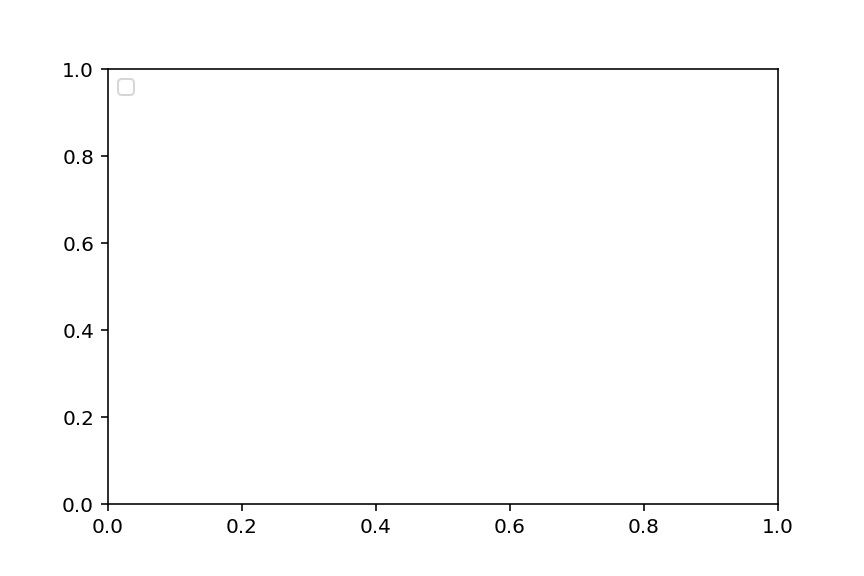

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


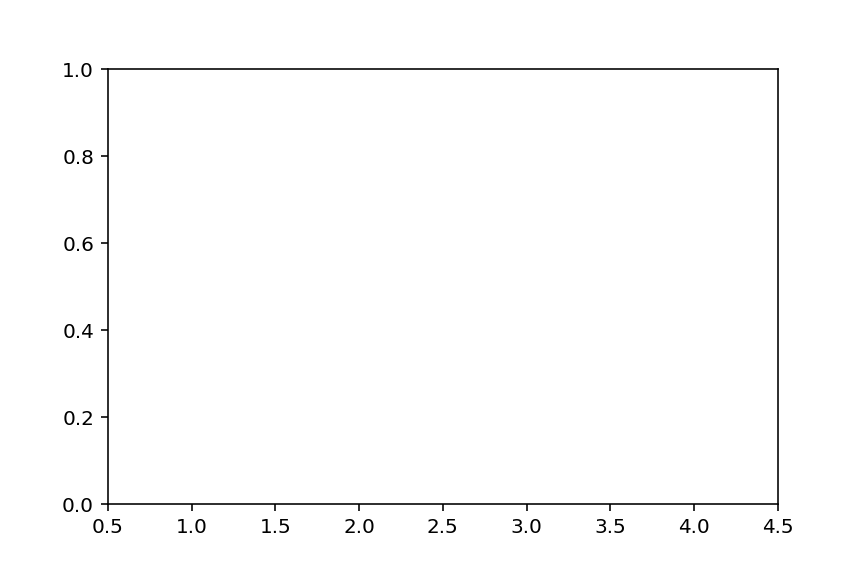

In [22]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


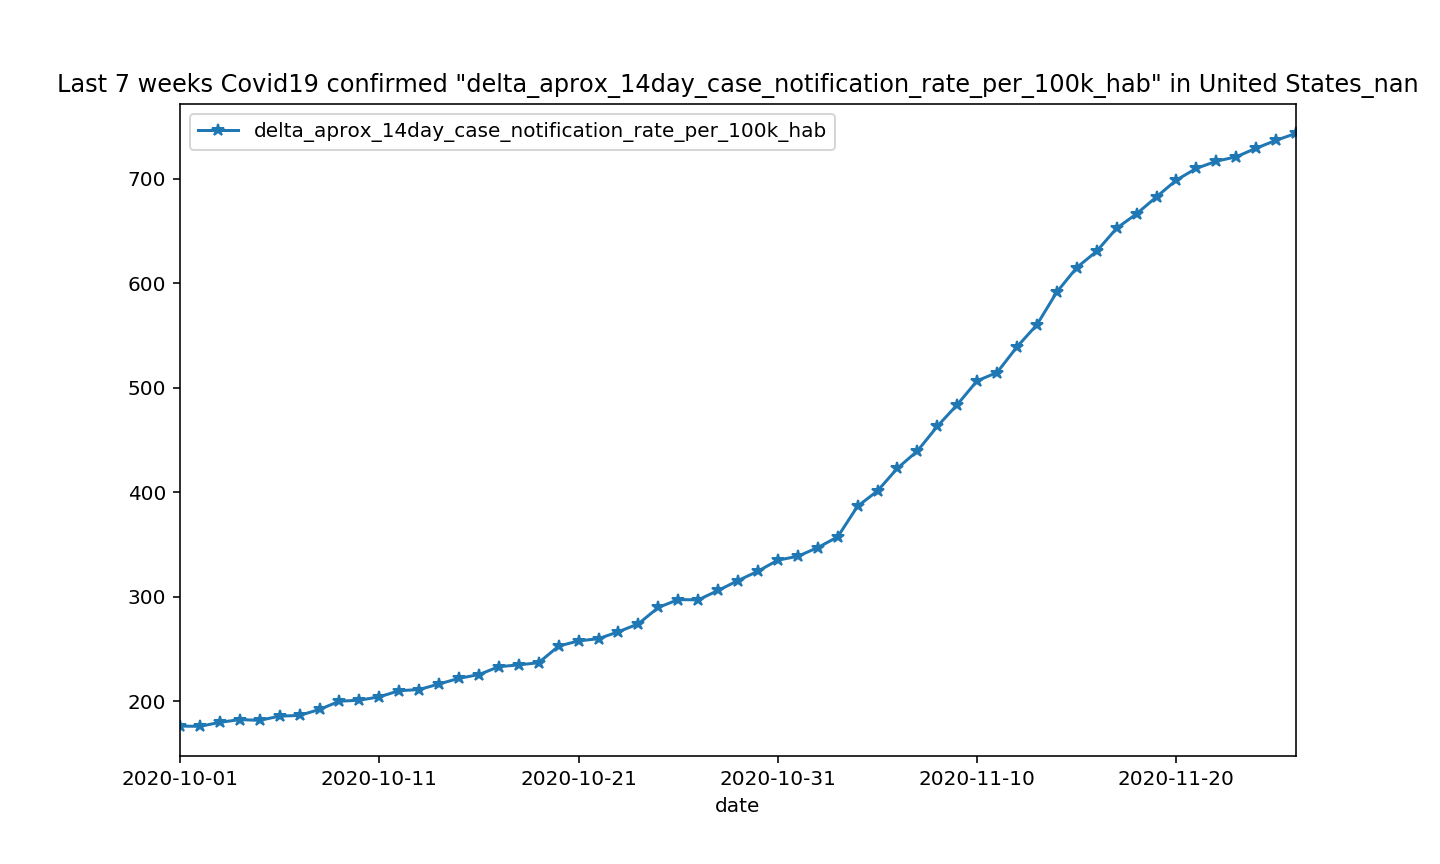

In [24]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


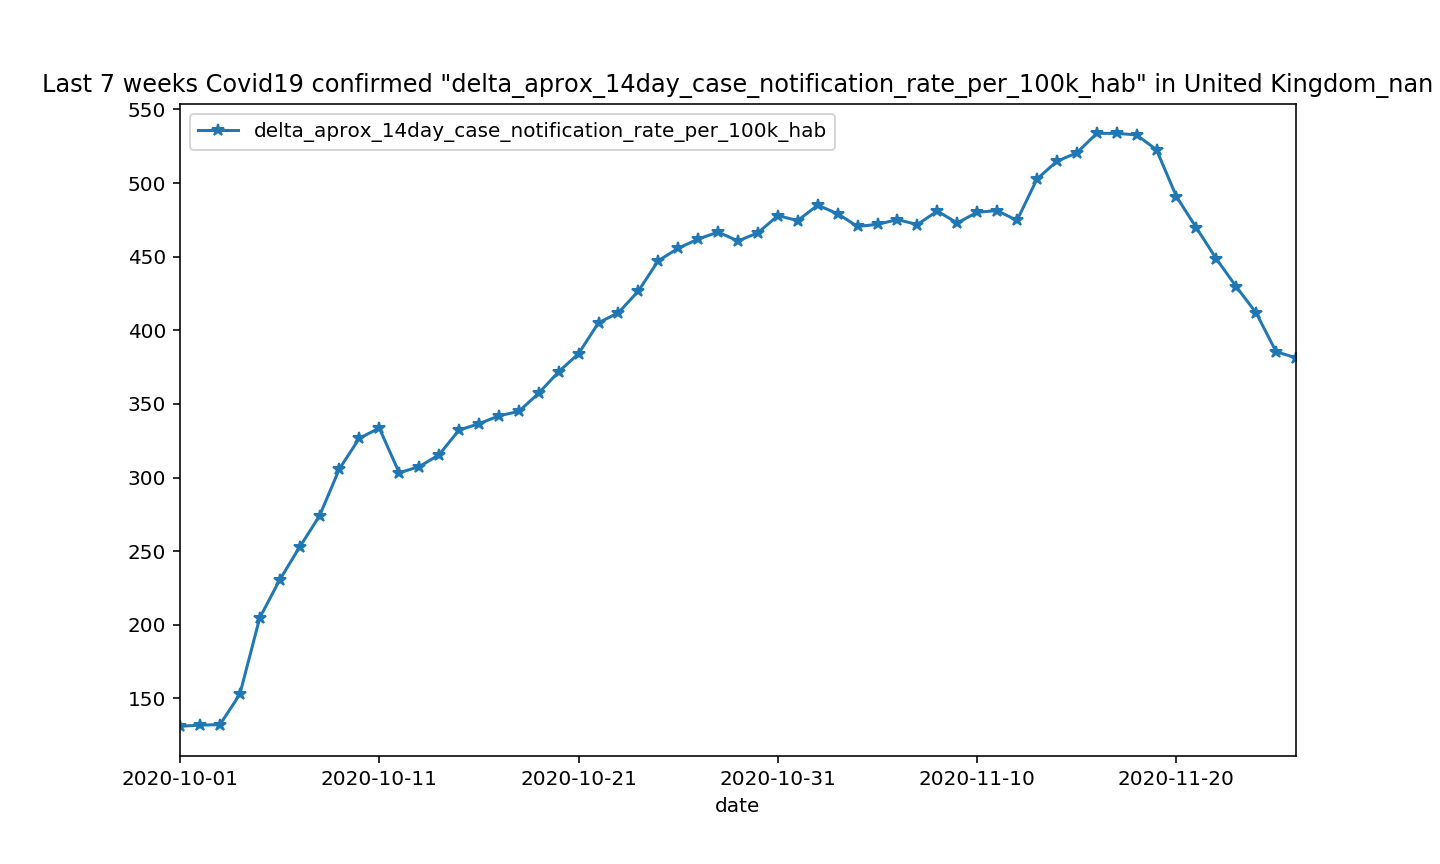

In [25]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


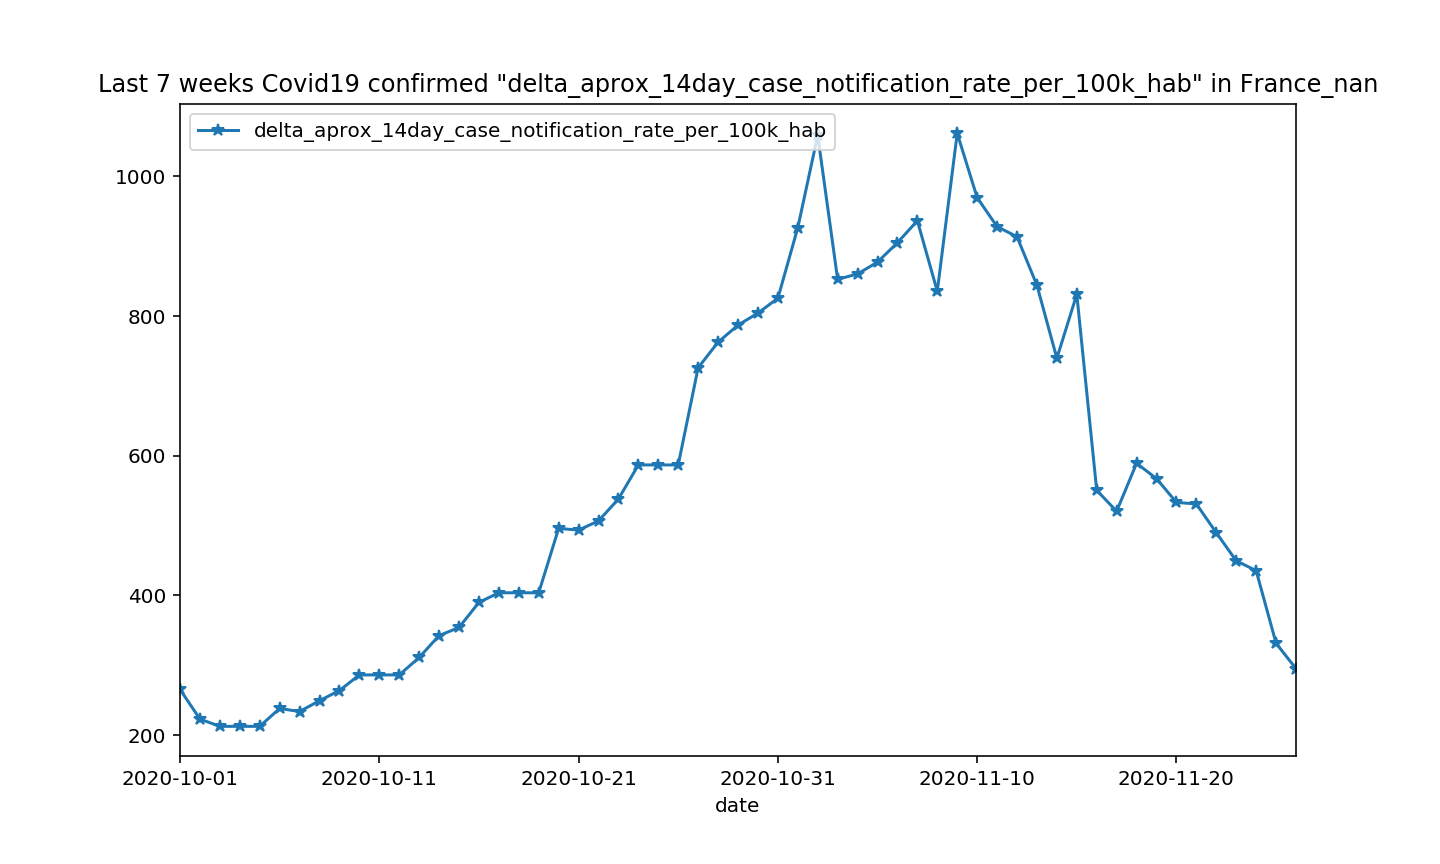

In [26]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


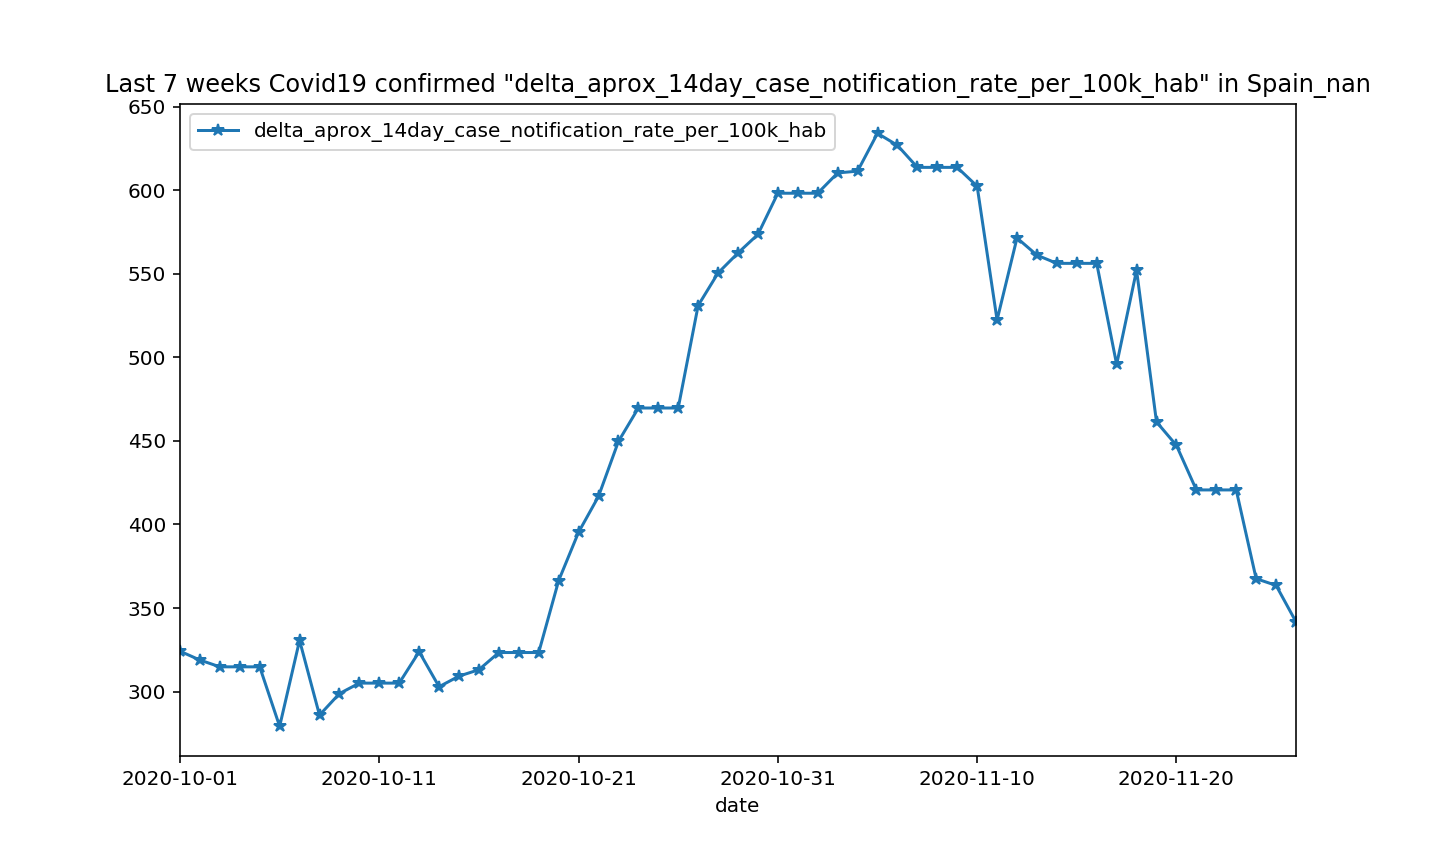

In [27]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


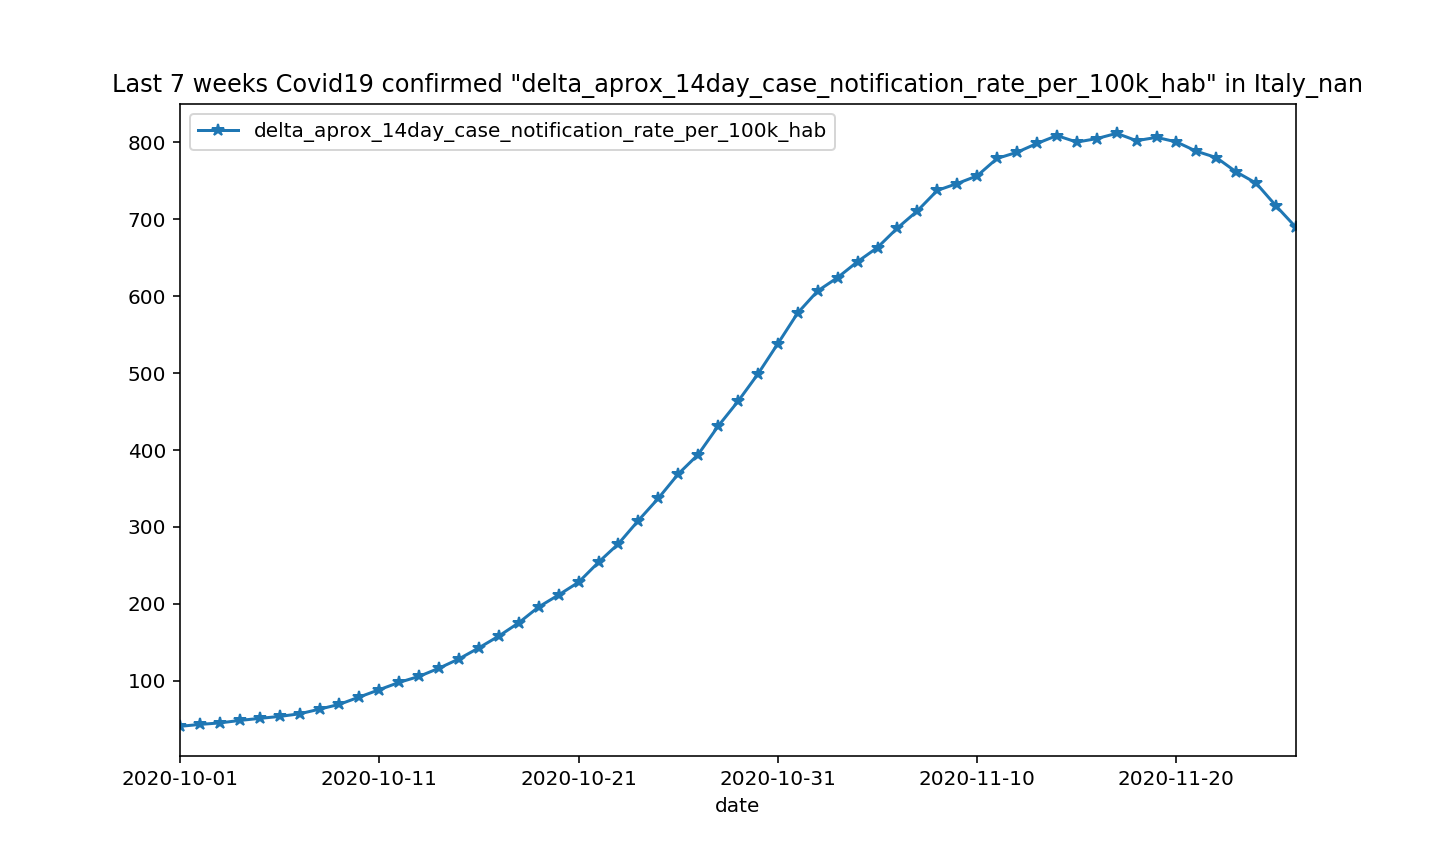

In [28]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


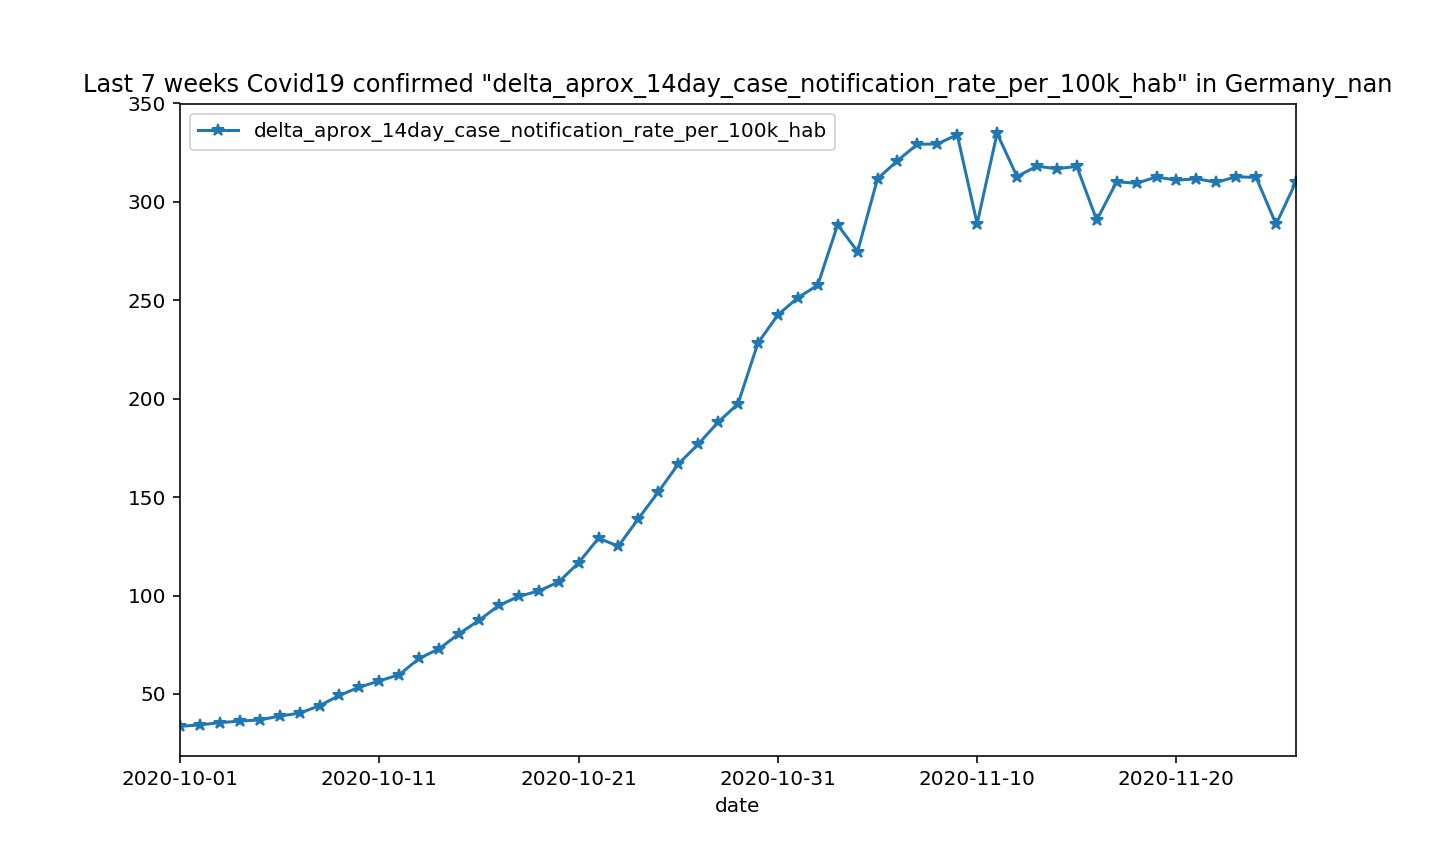

In [29]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


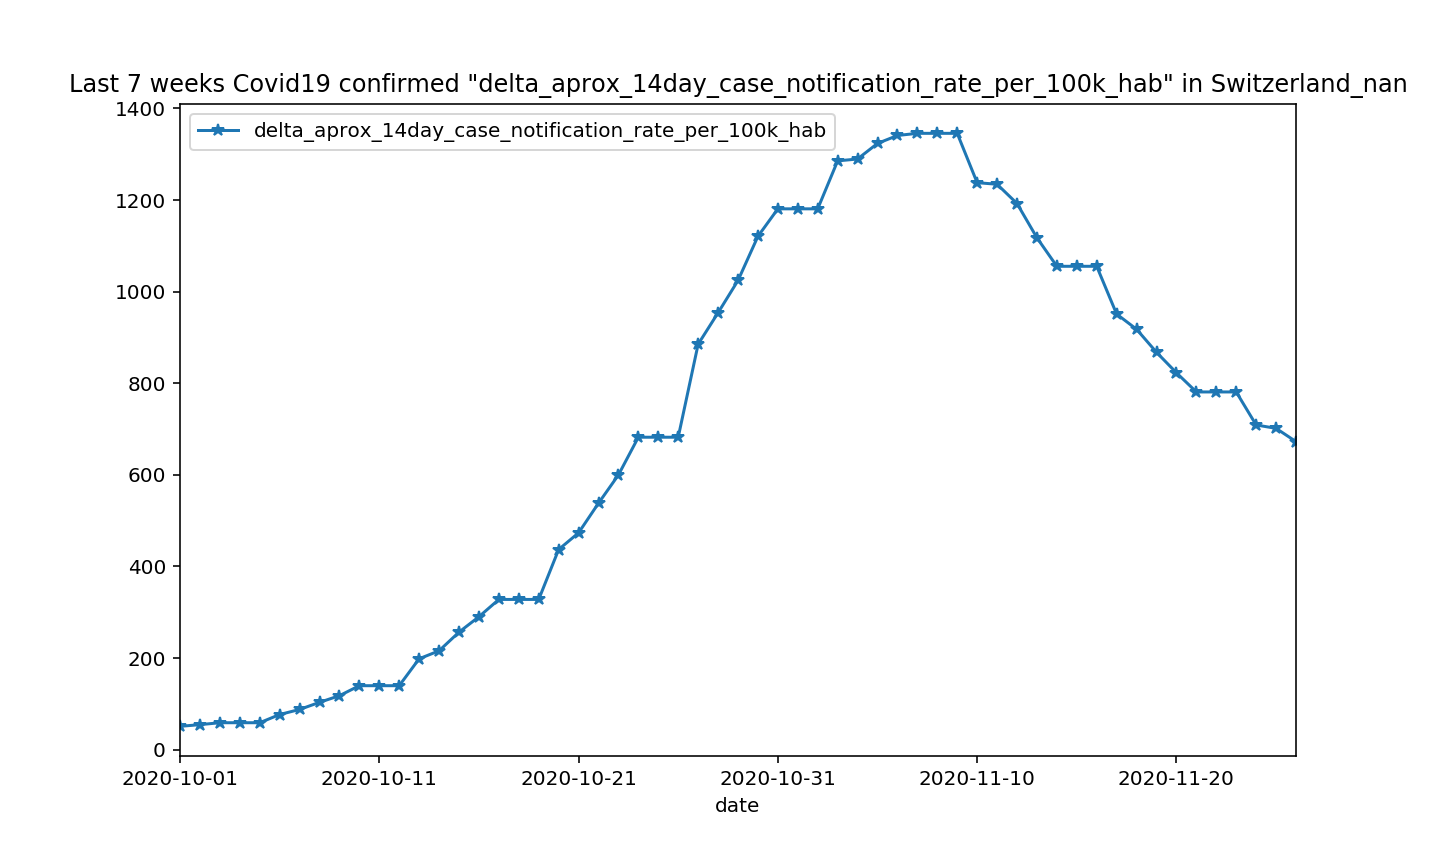

In [30]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


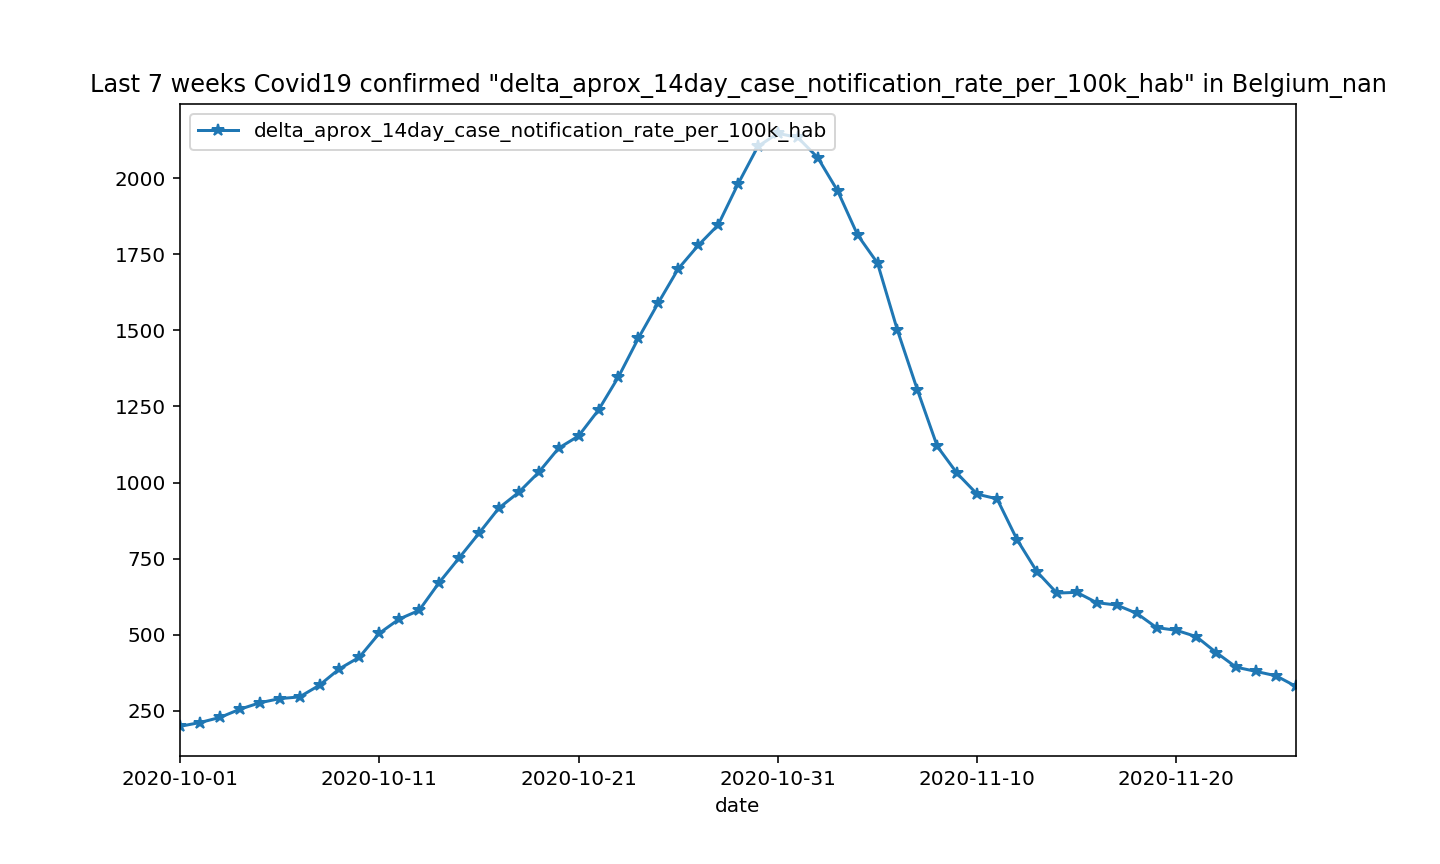

In [31]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


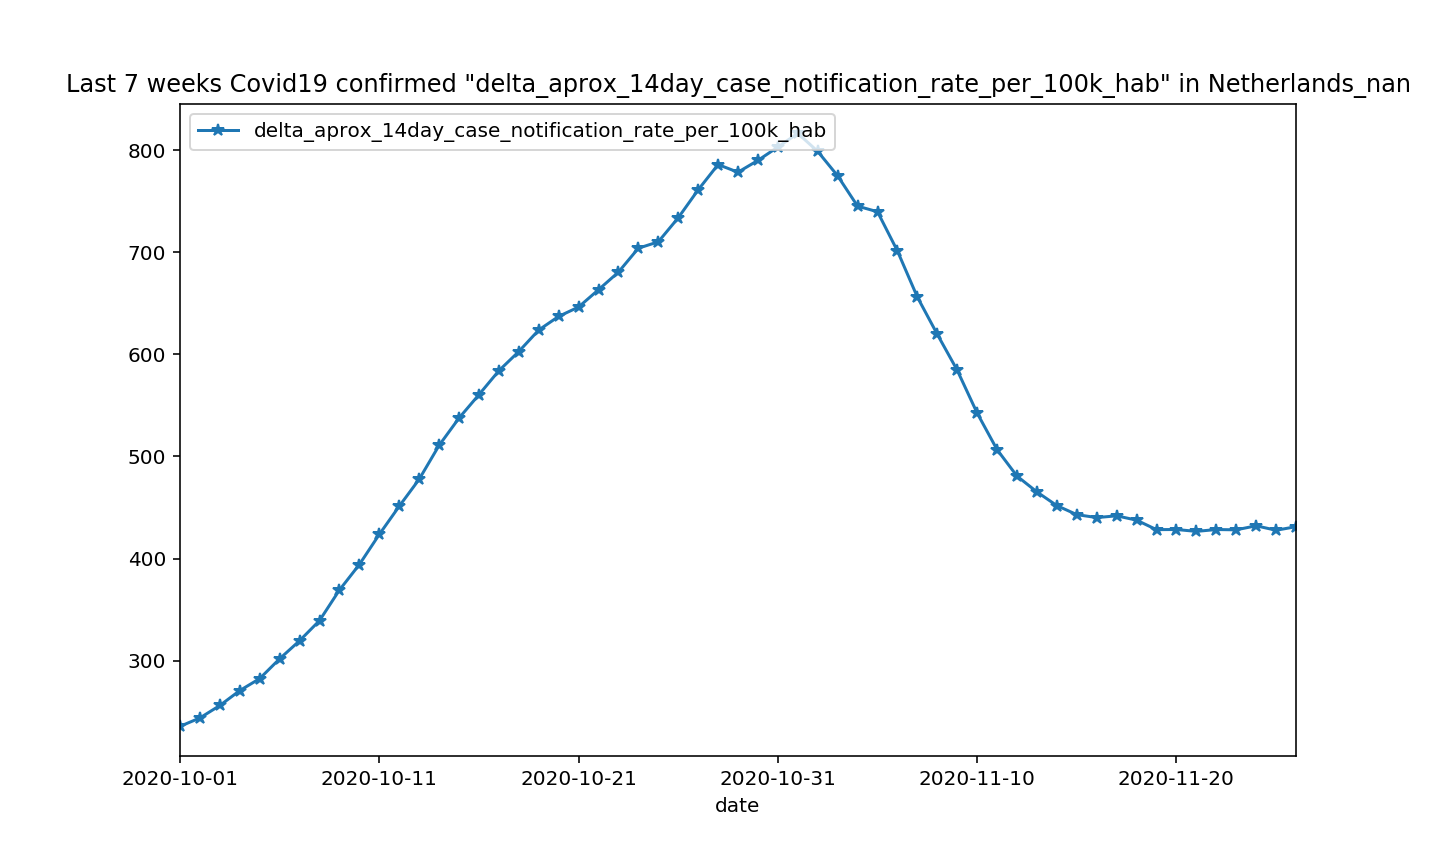

In [32]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


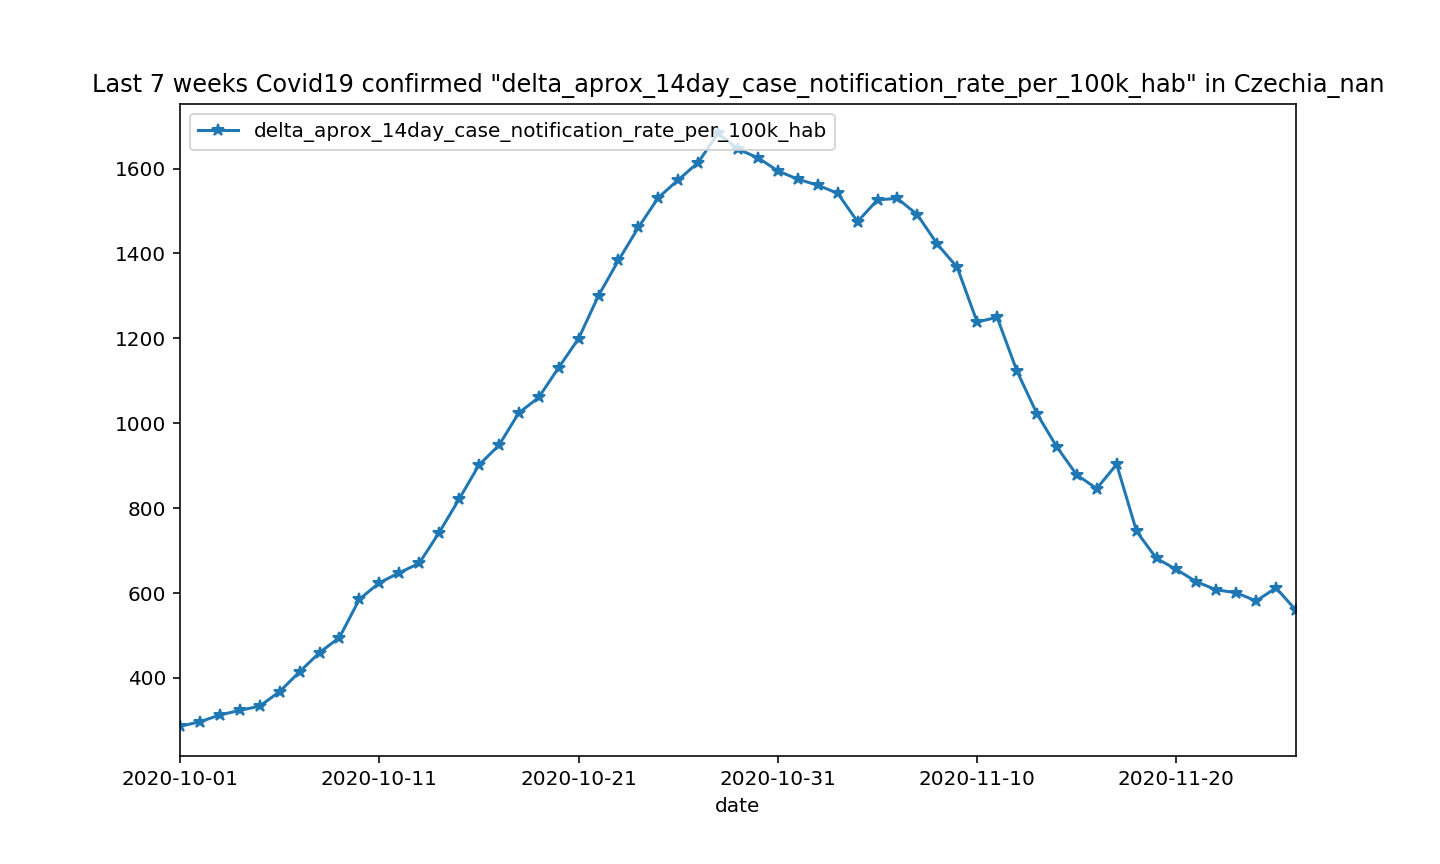

In [33]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


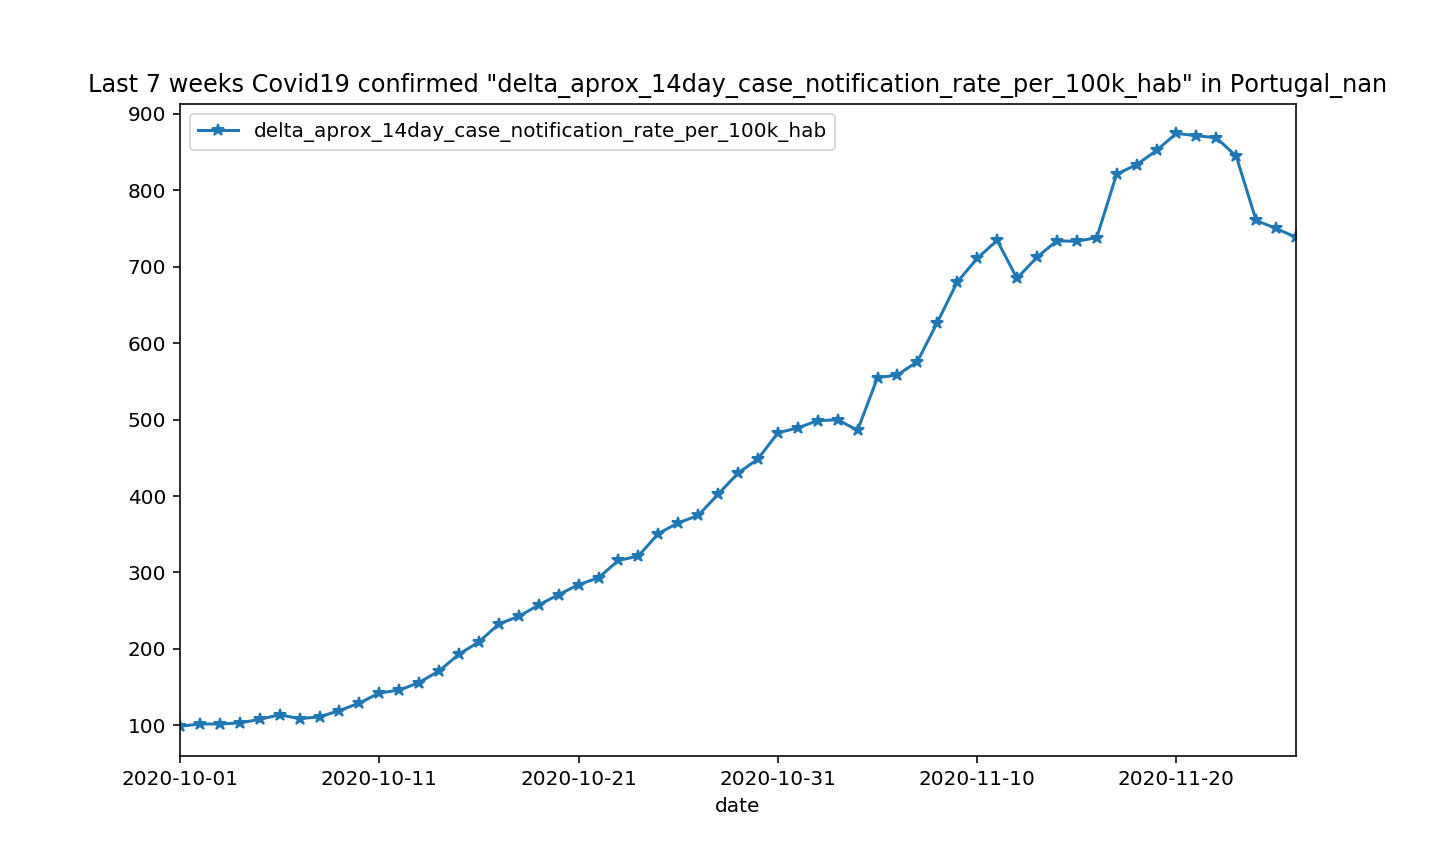

In [34]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [35]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


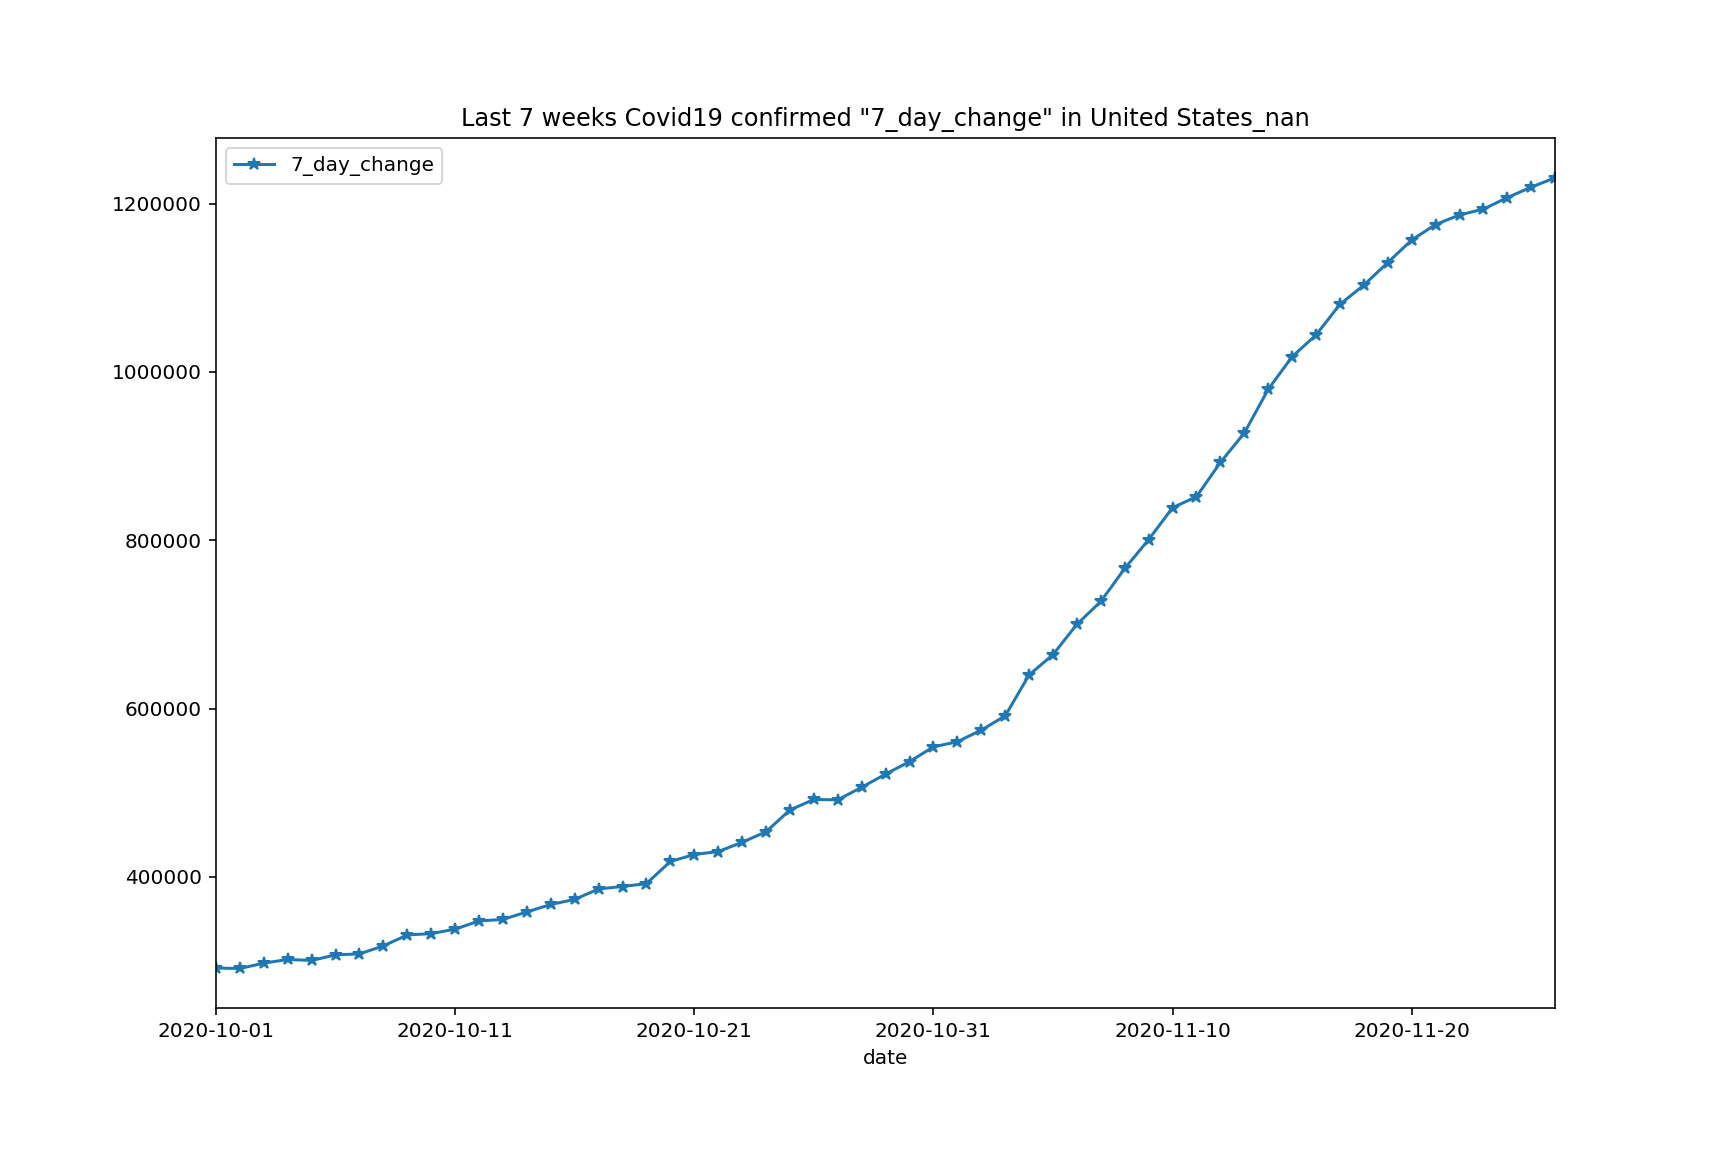

In [36]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


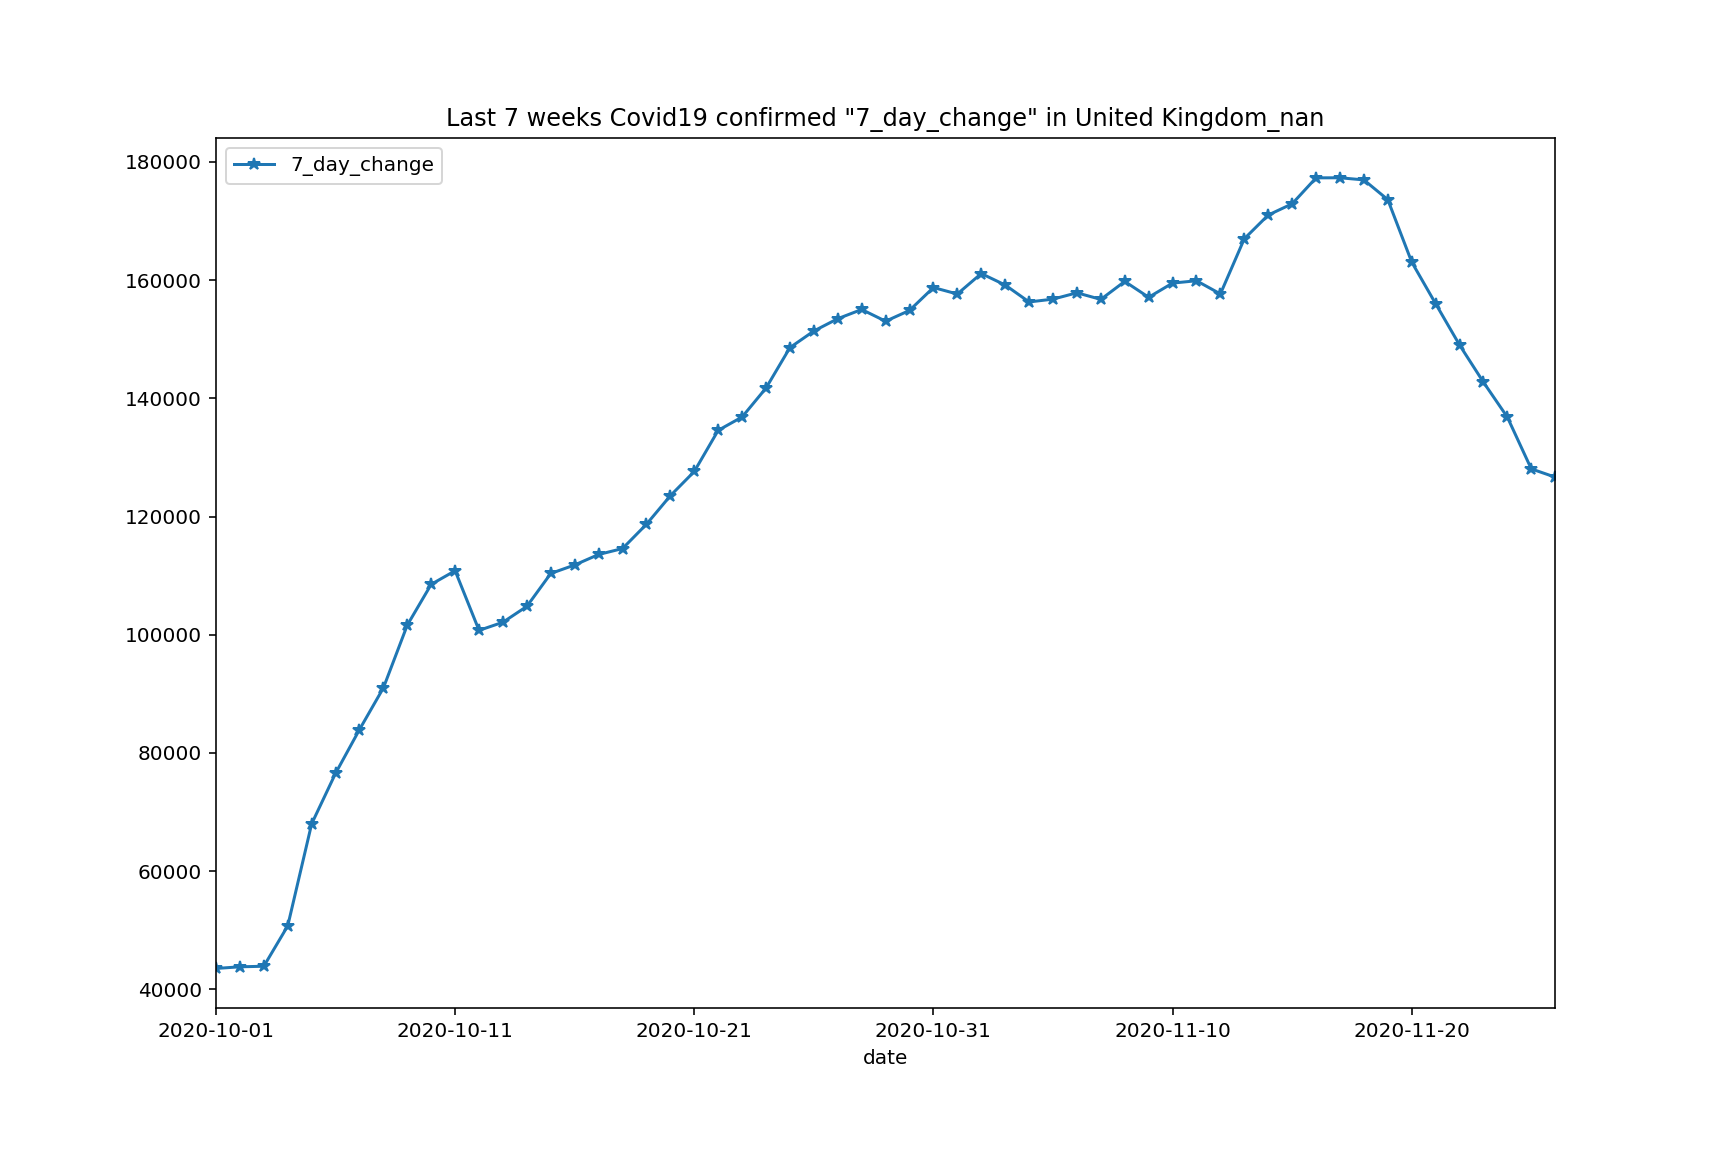

In [37]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


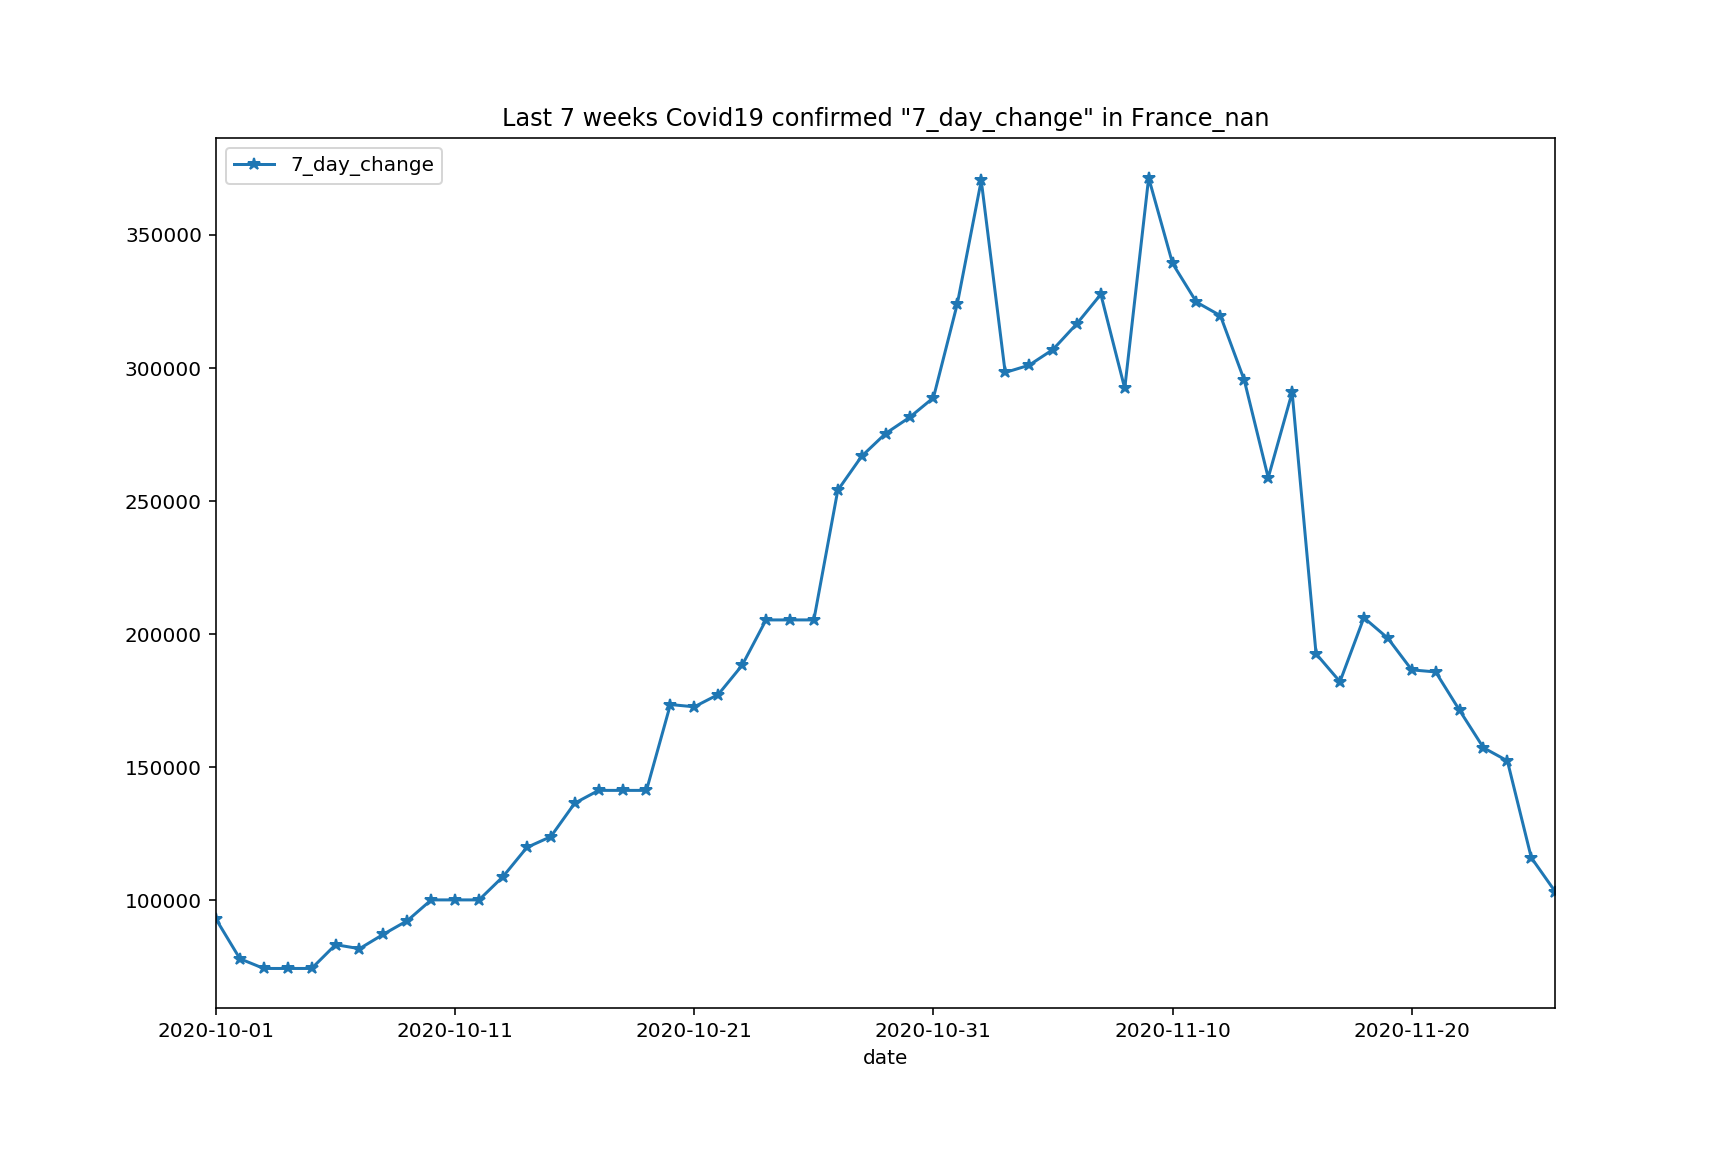

In [38]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


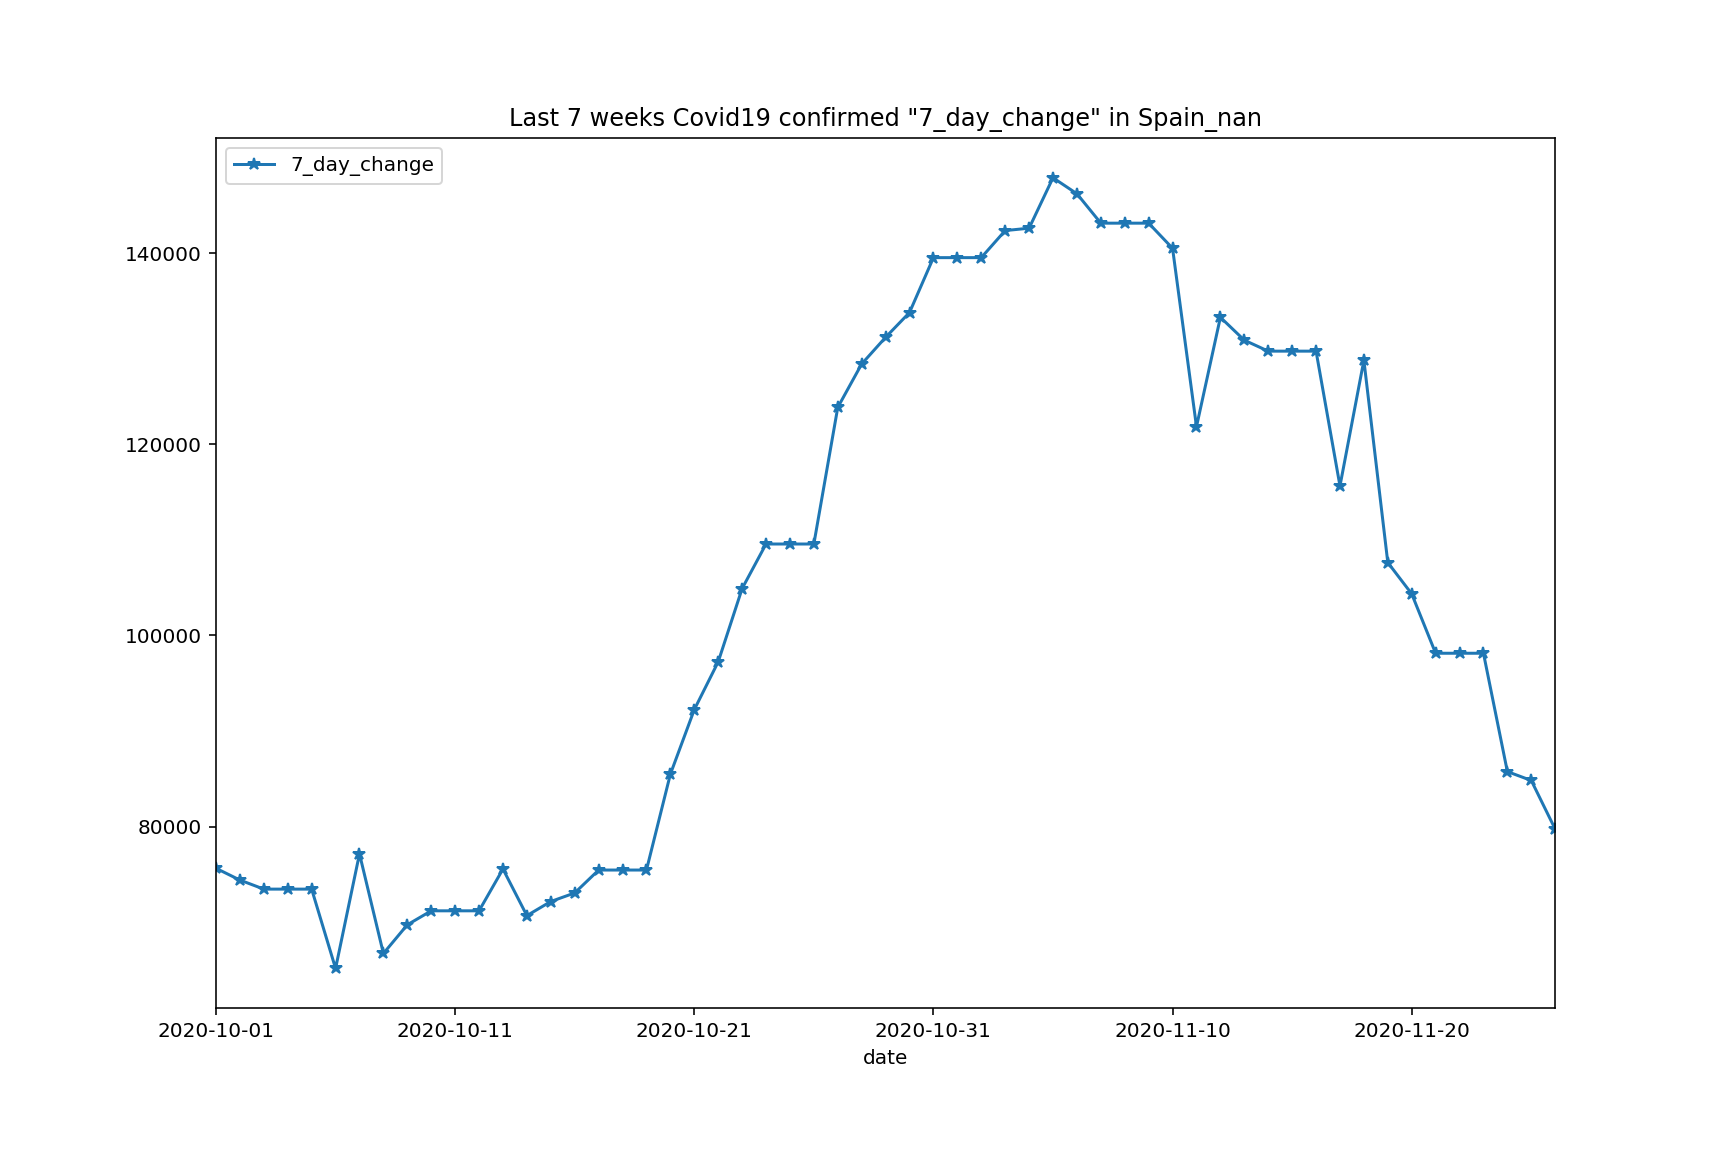

In [39]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


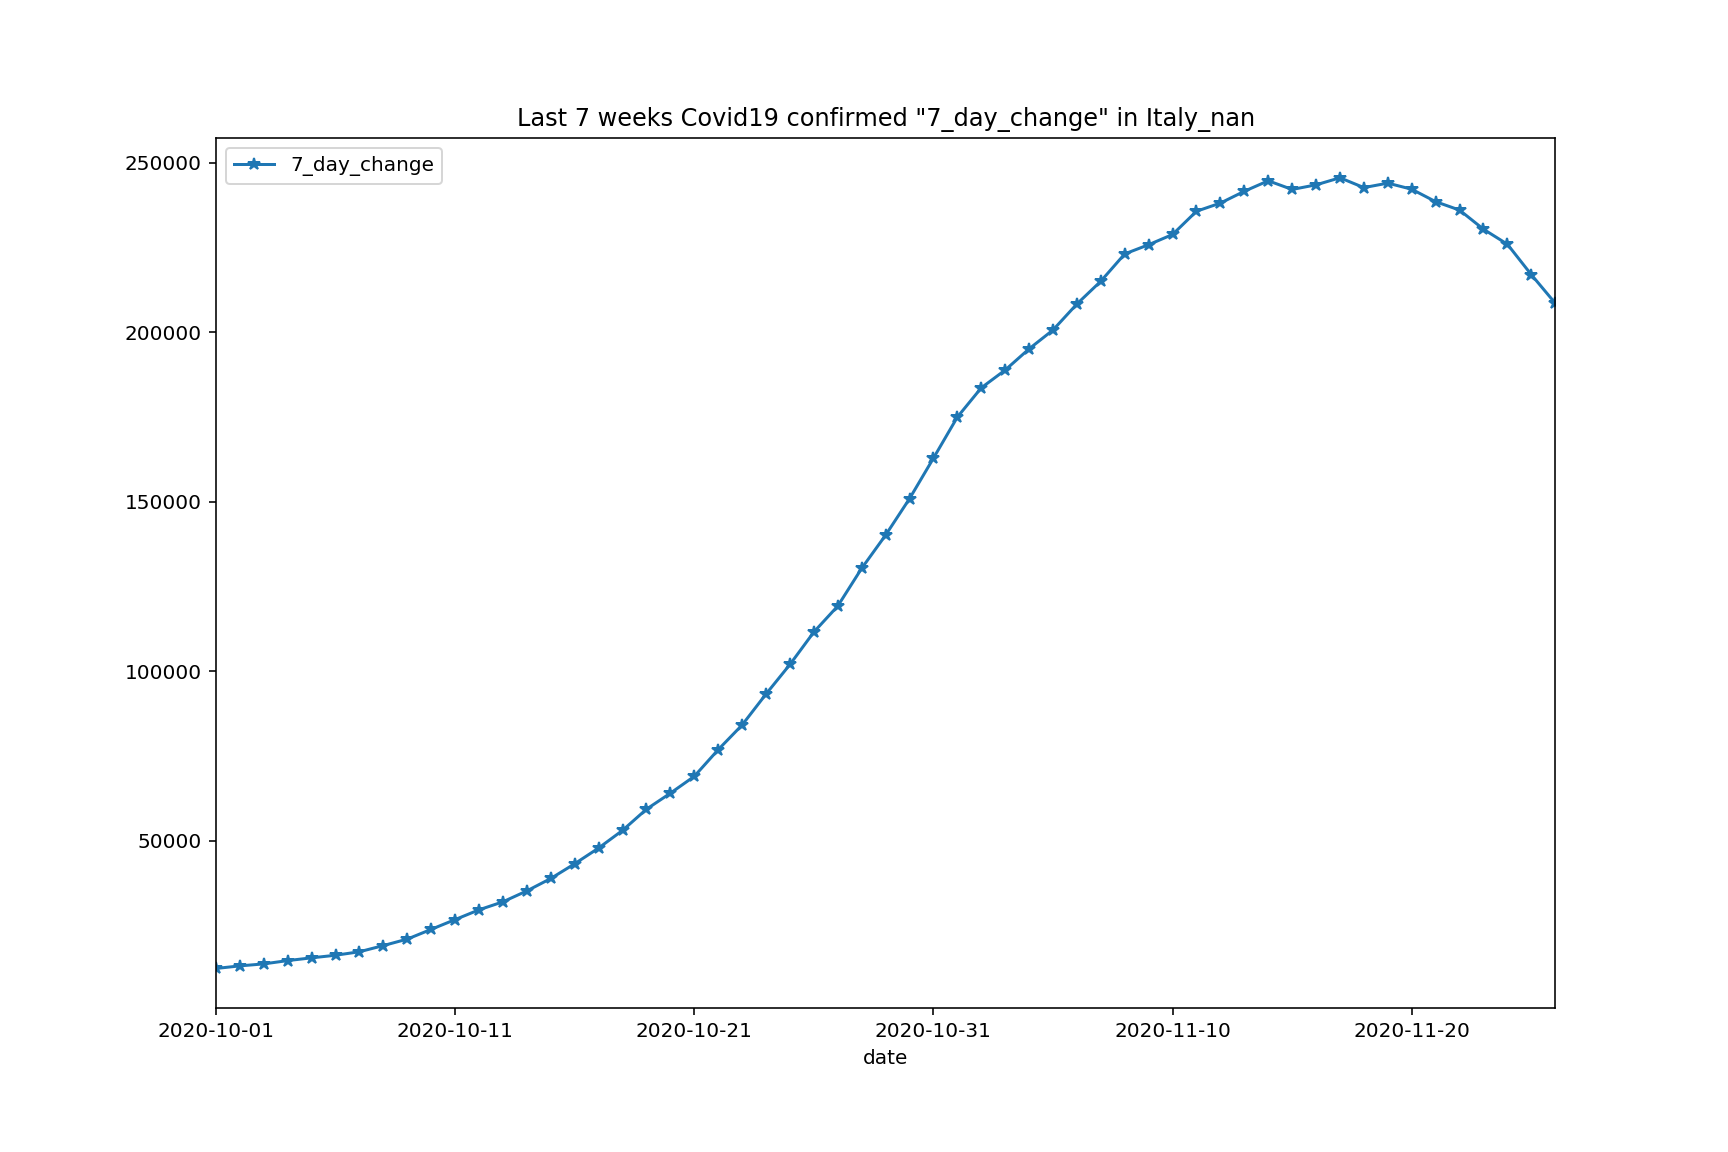

In [40]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


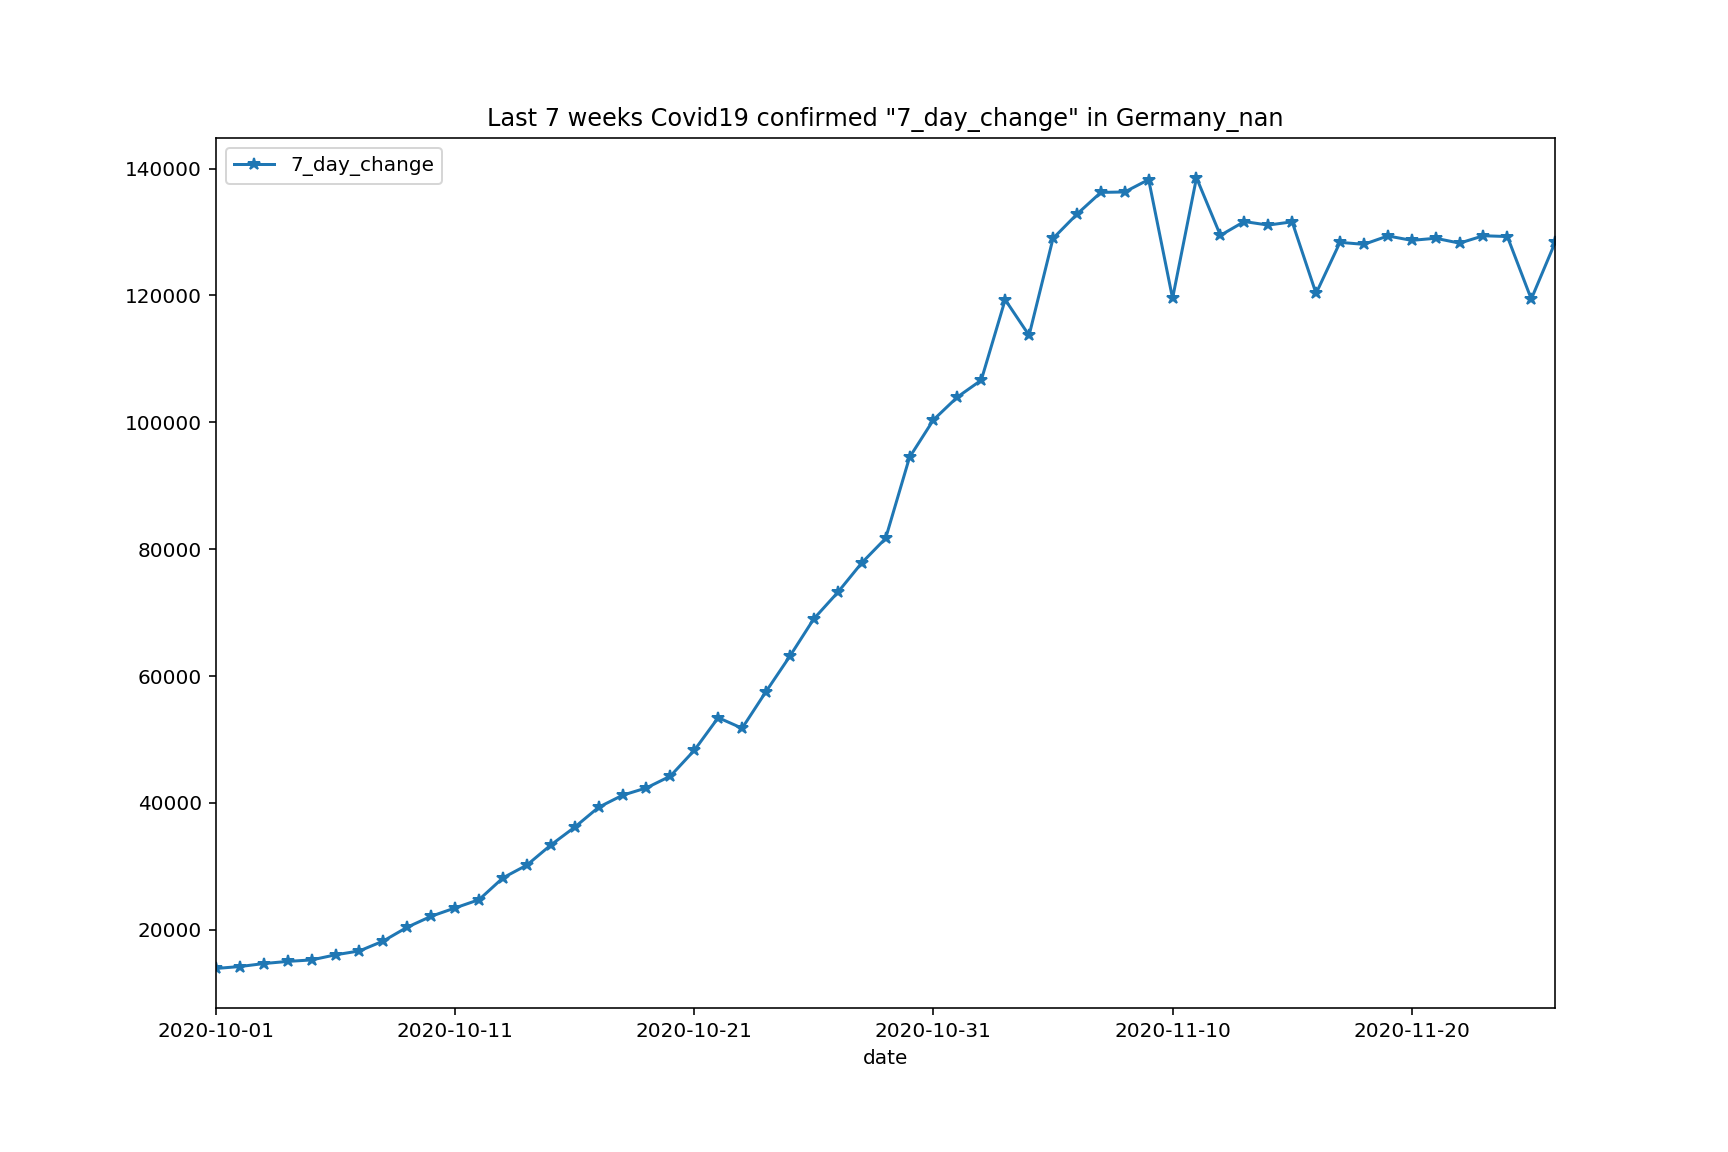

In [41]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


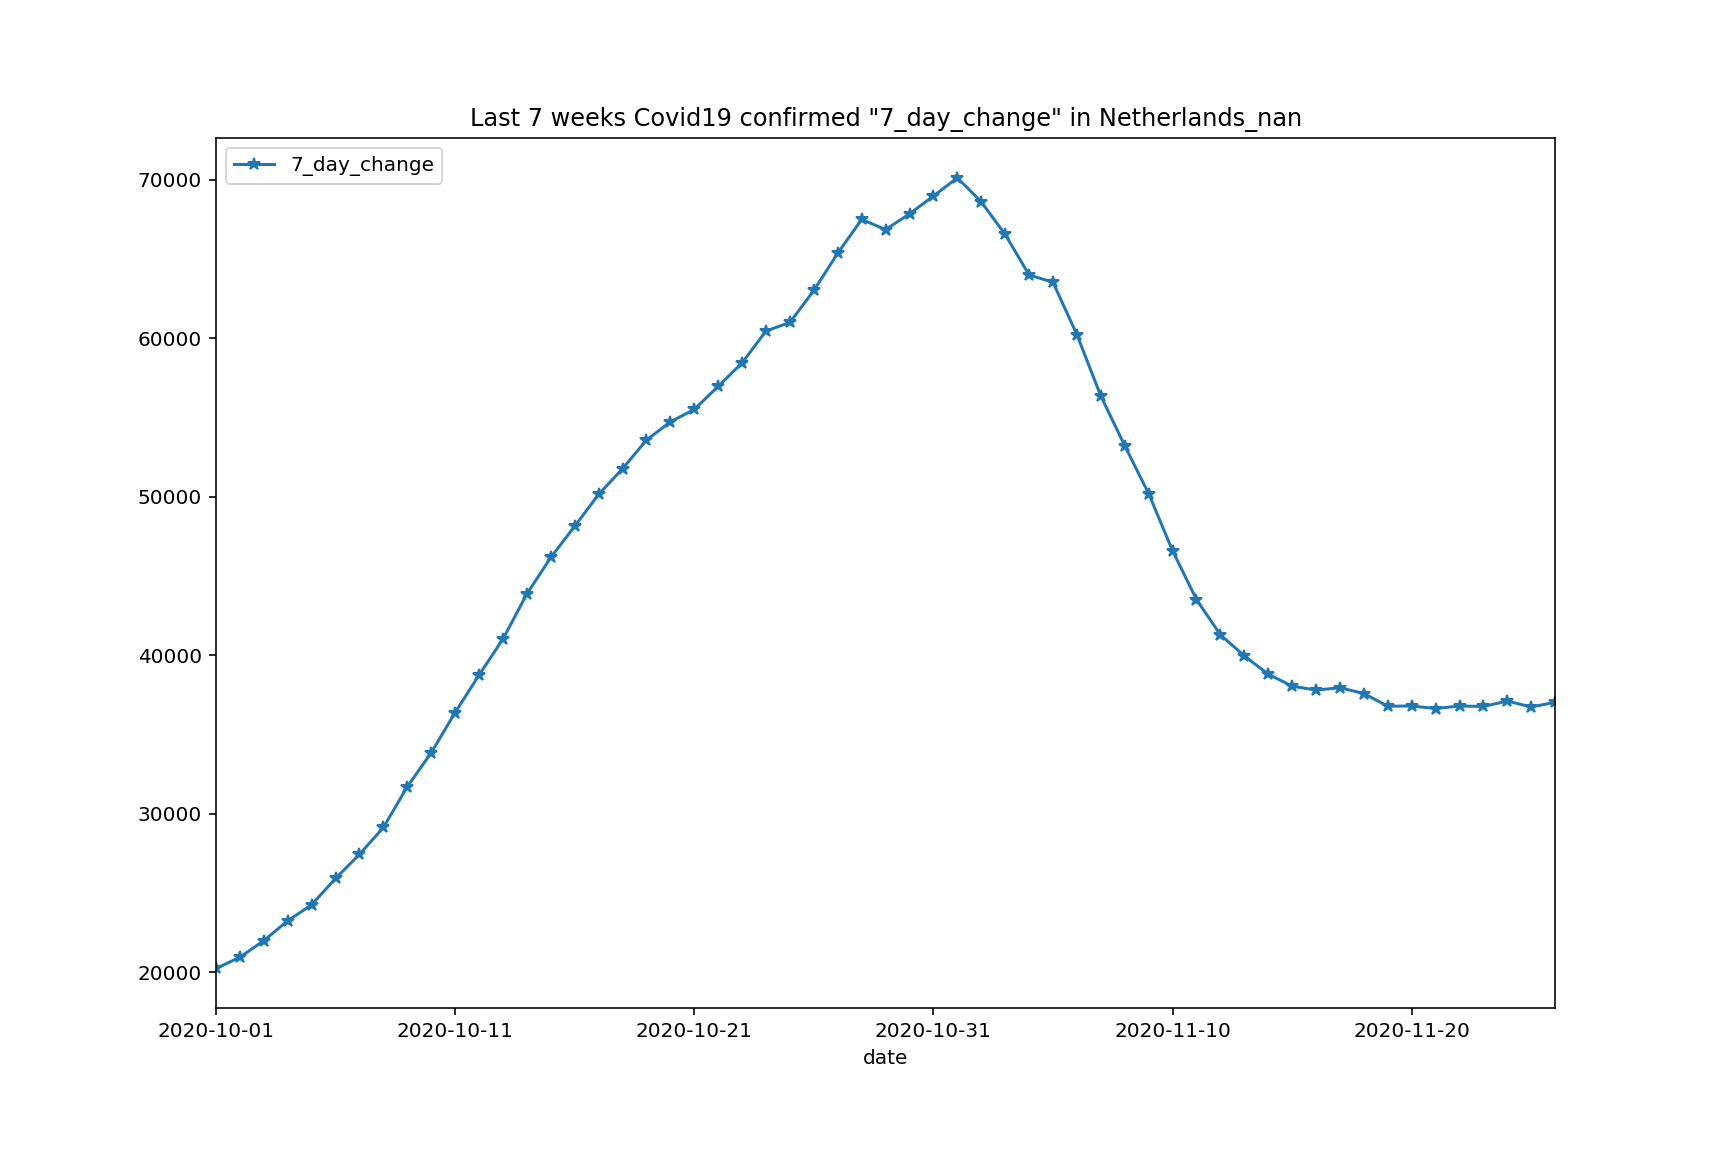

In [42]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


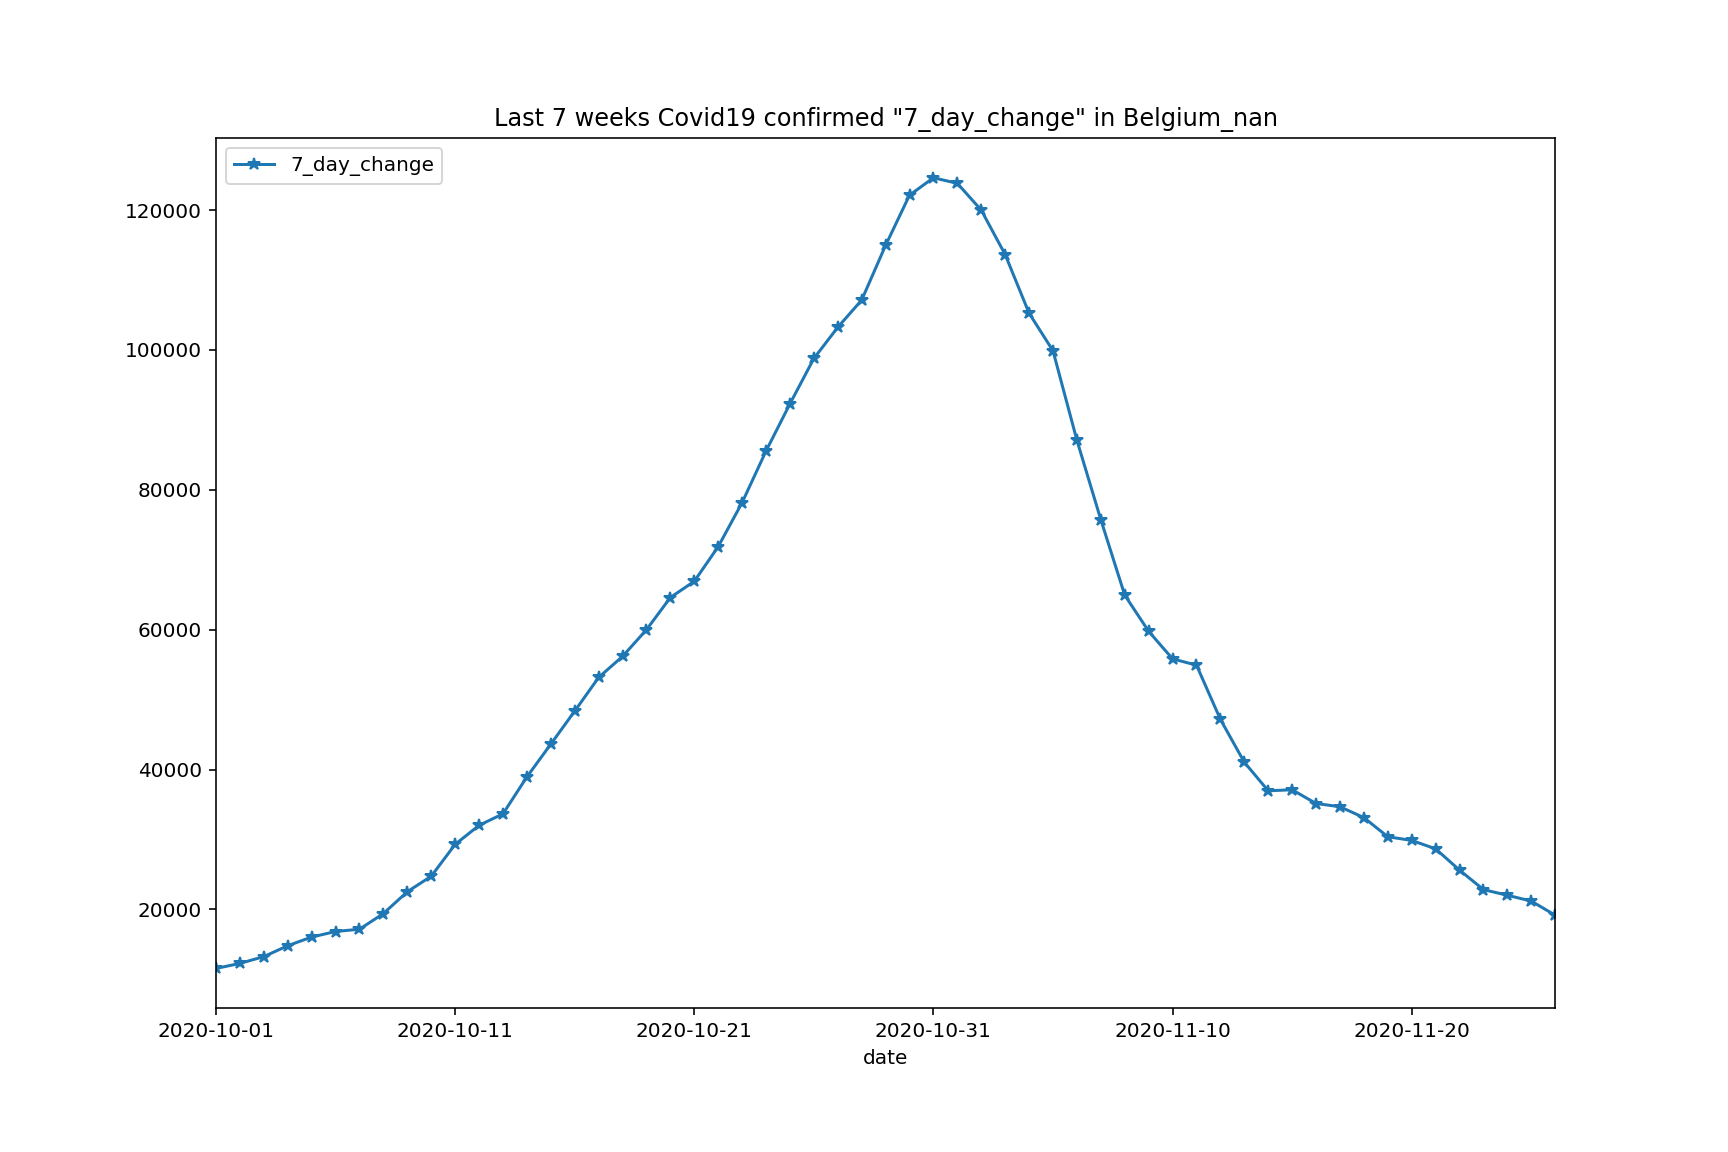

In [43]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


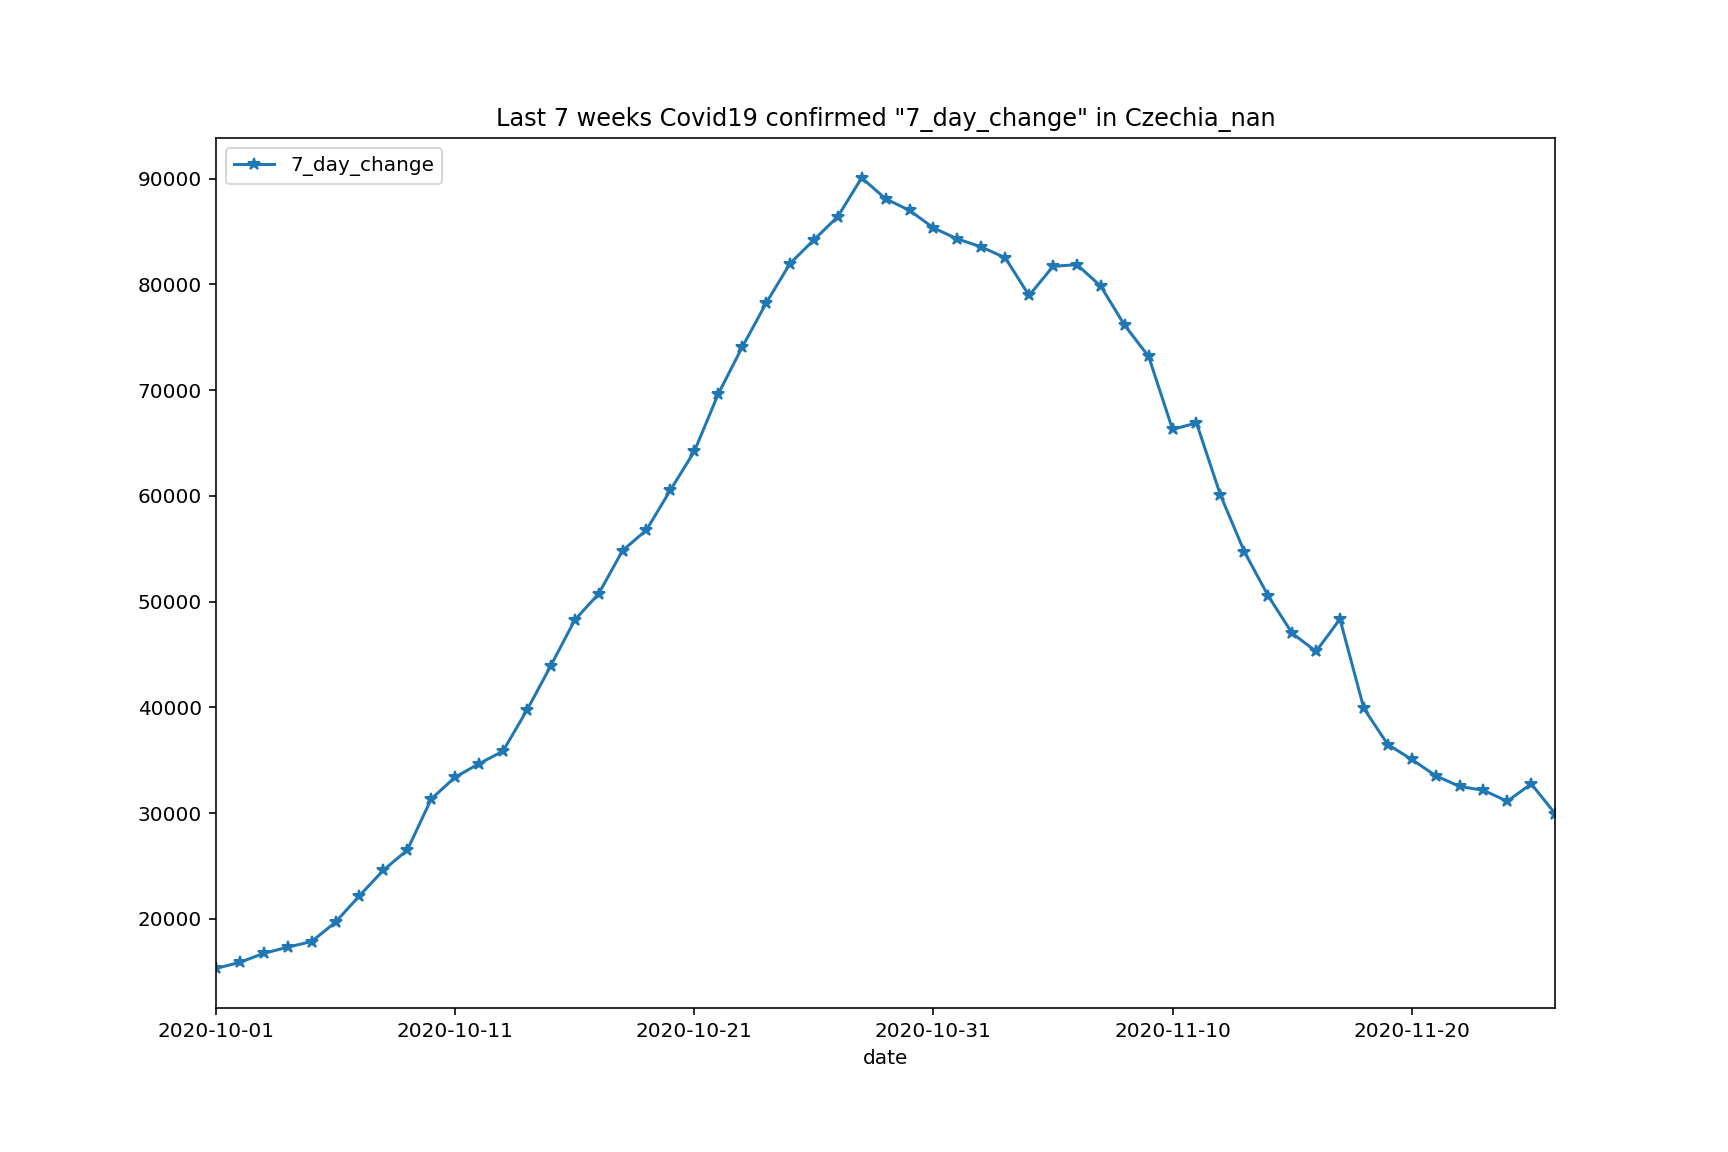

In [44]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


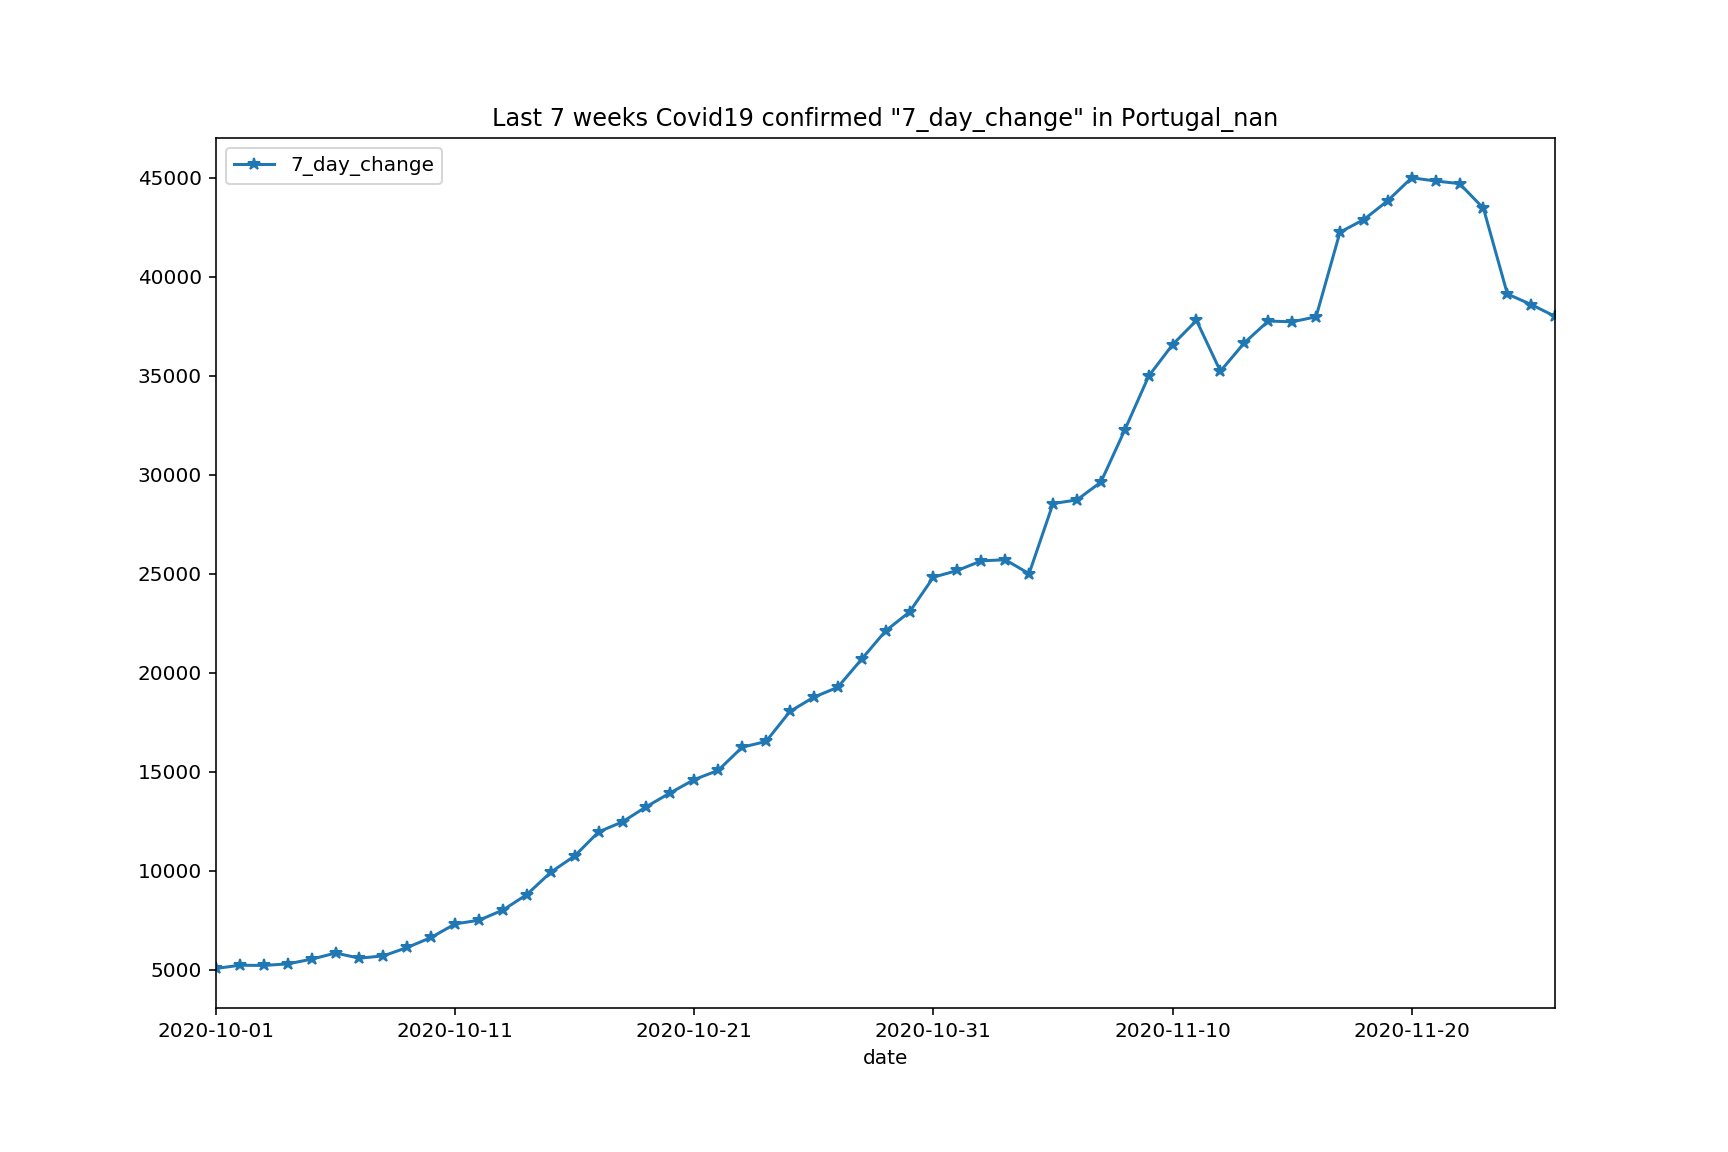

In [45]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [46]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


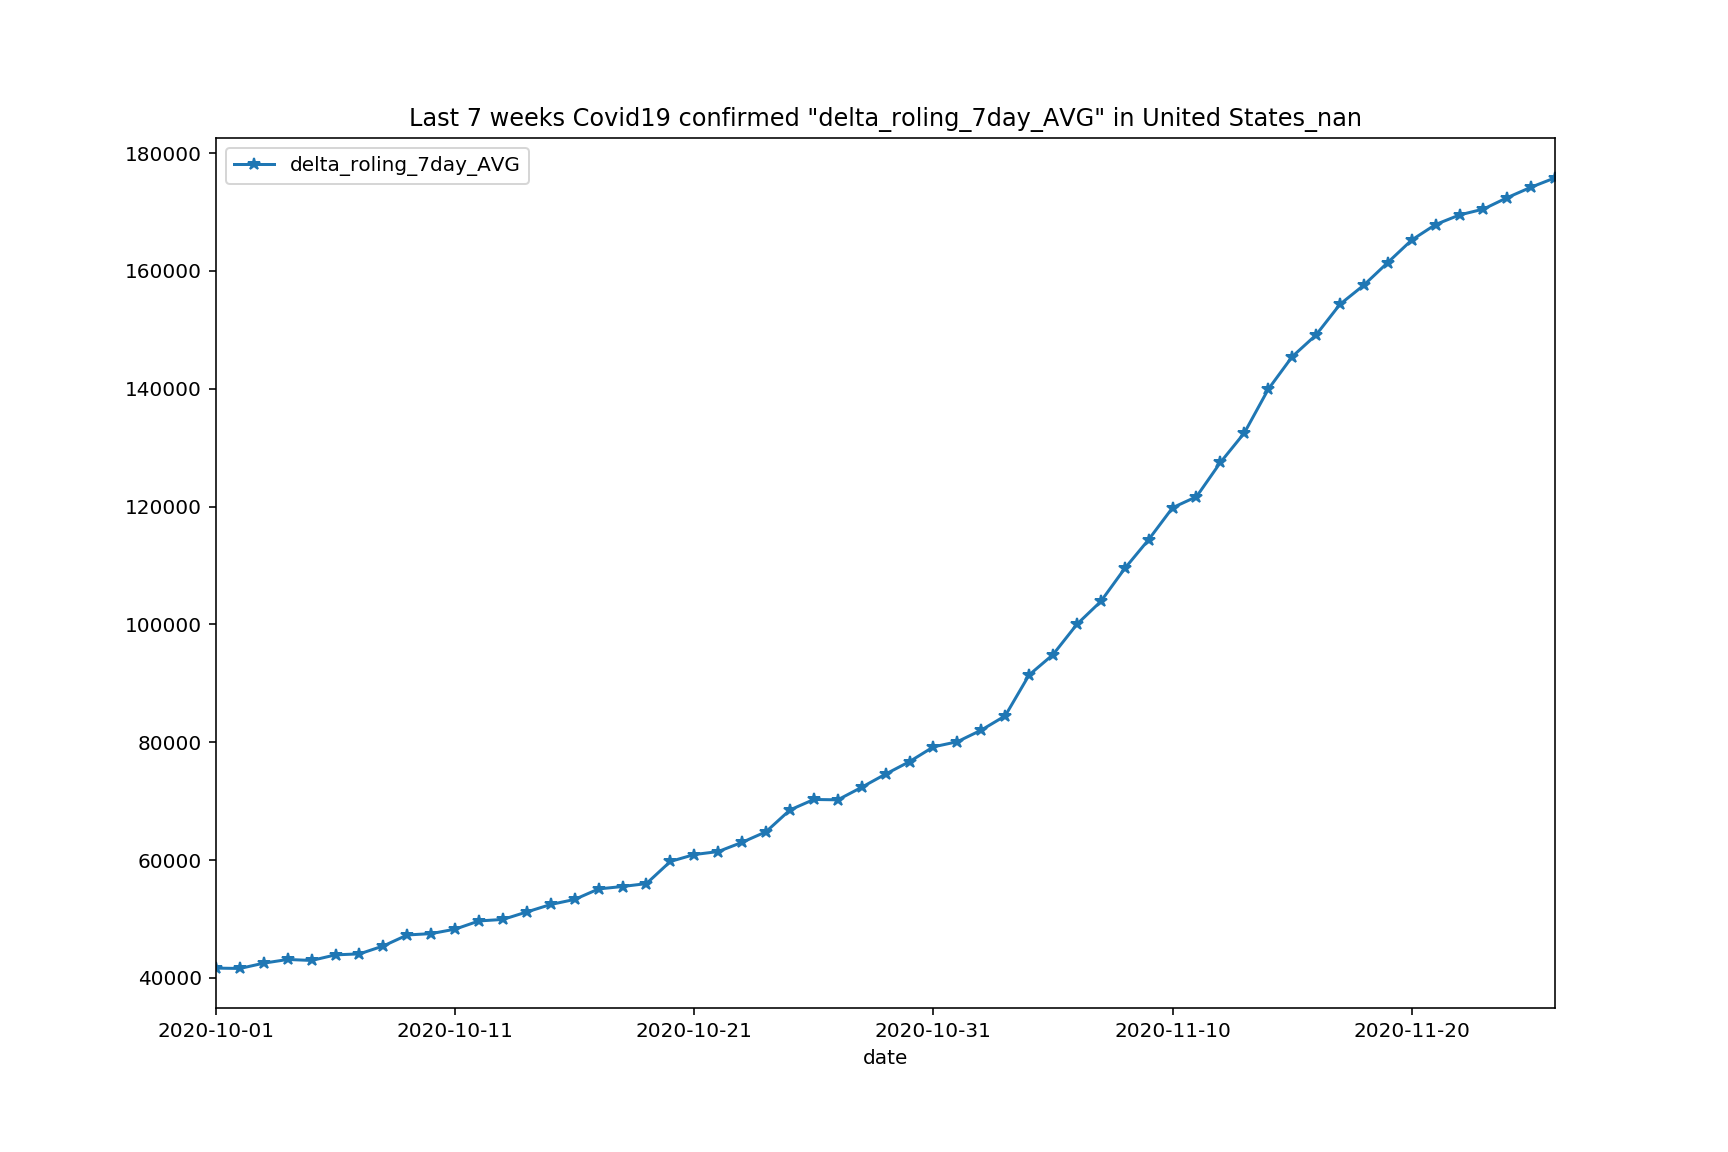

In [47]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


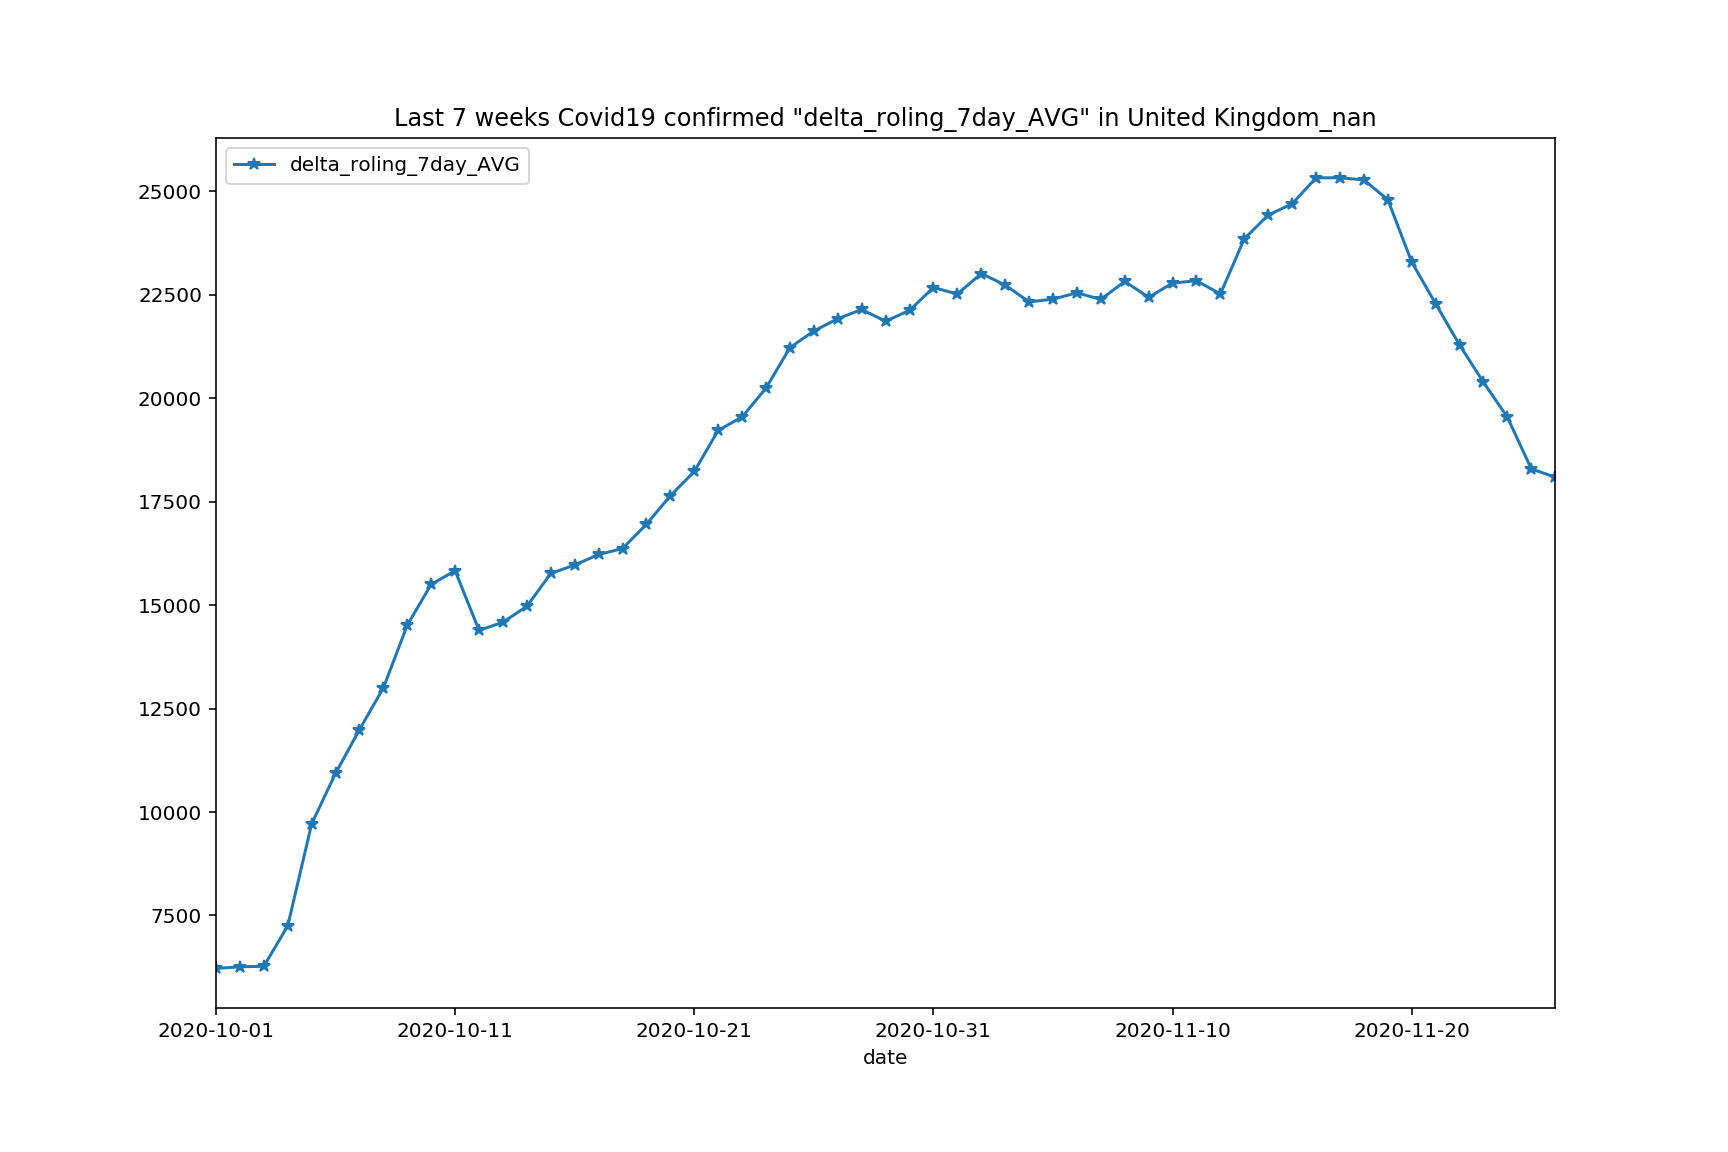

In [48]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


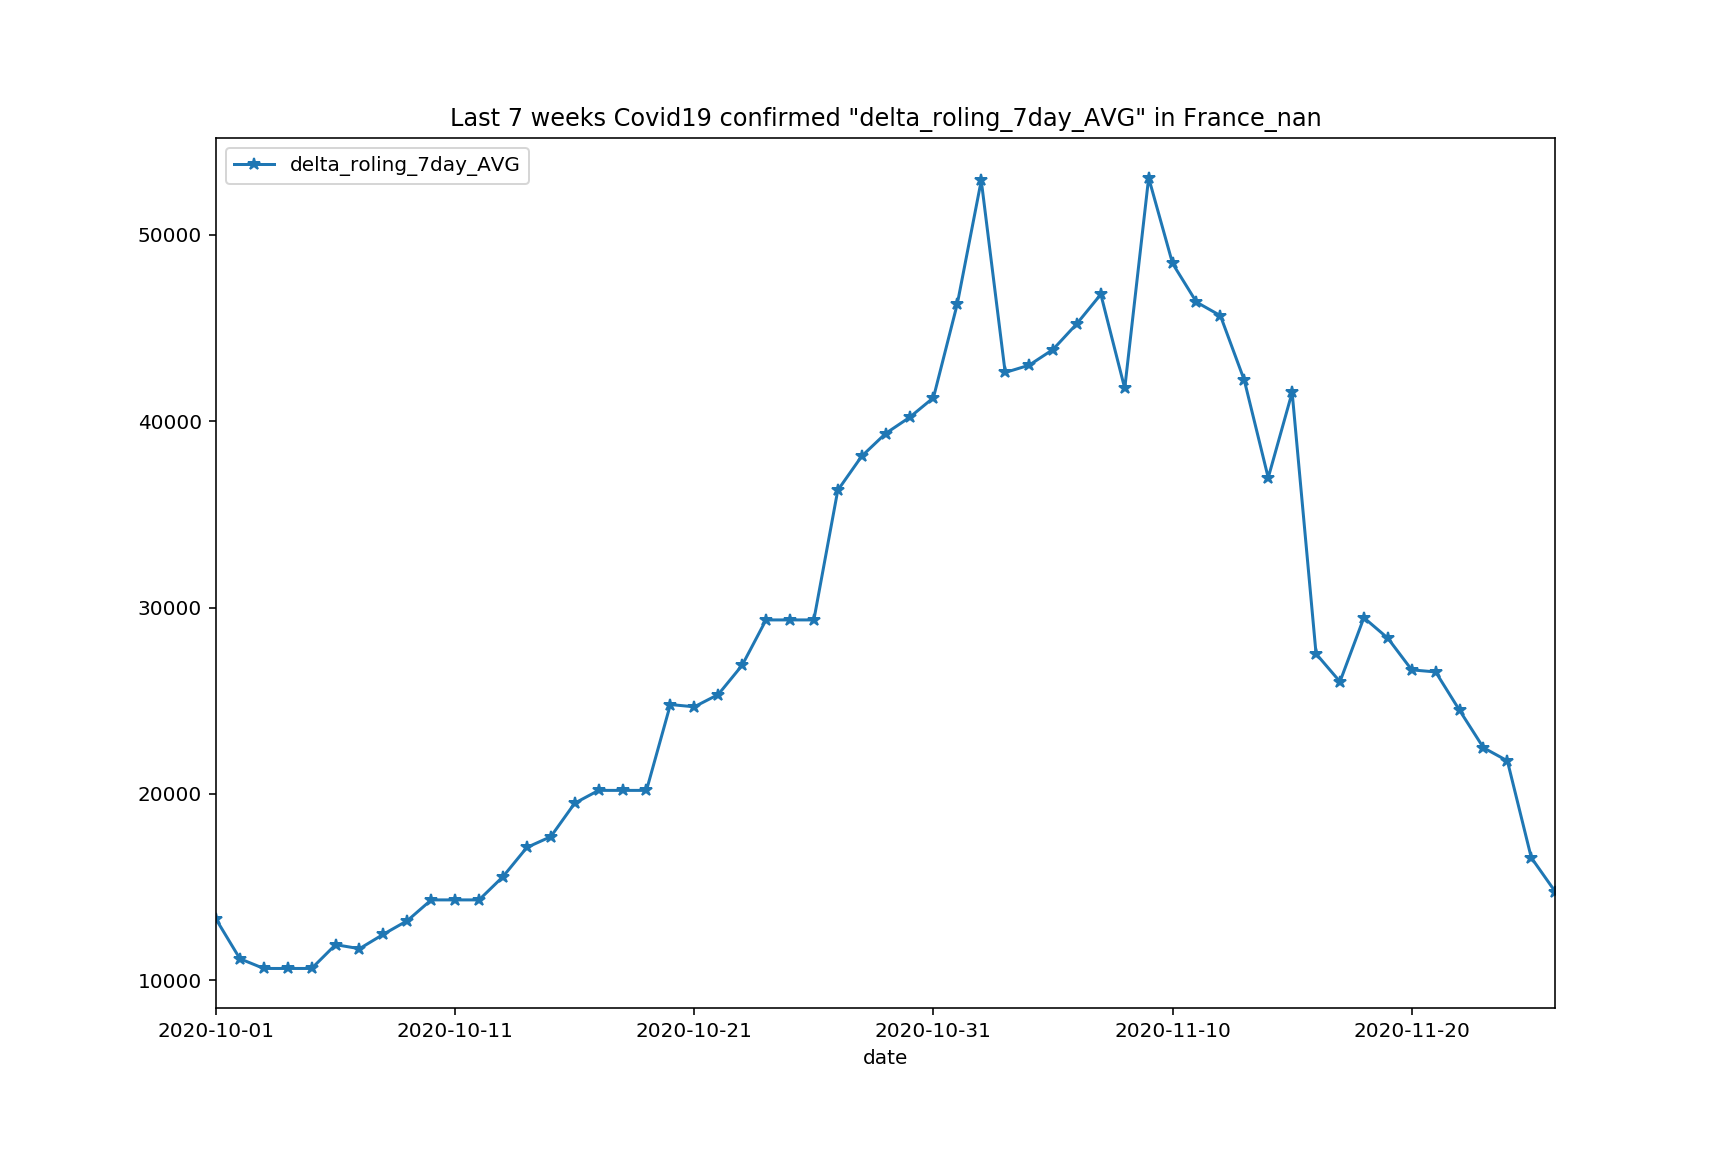

In [49]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


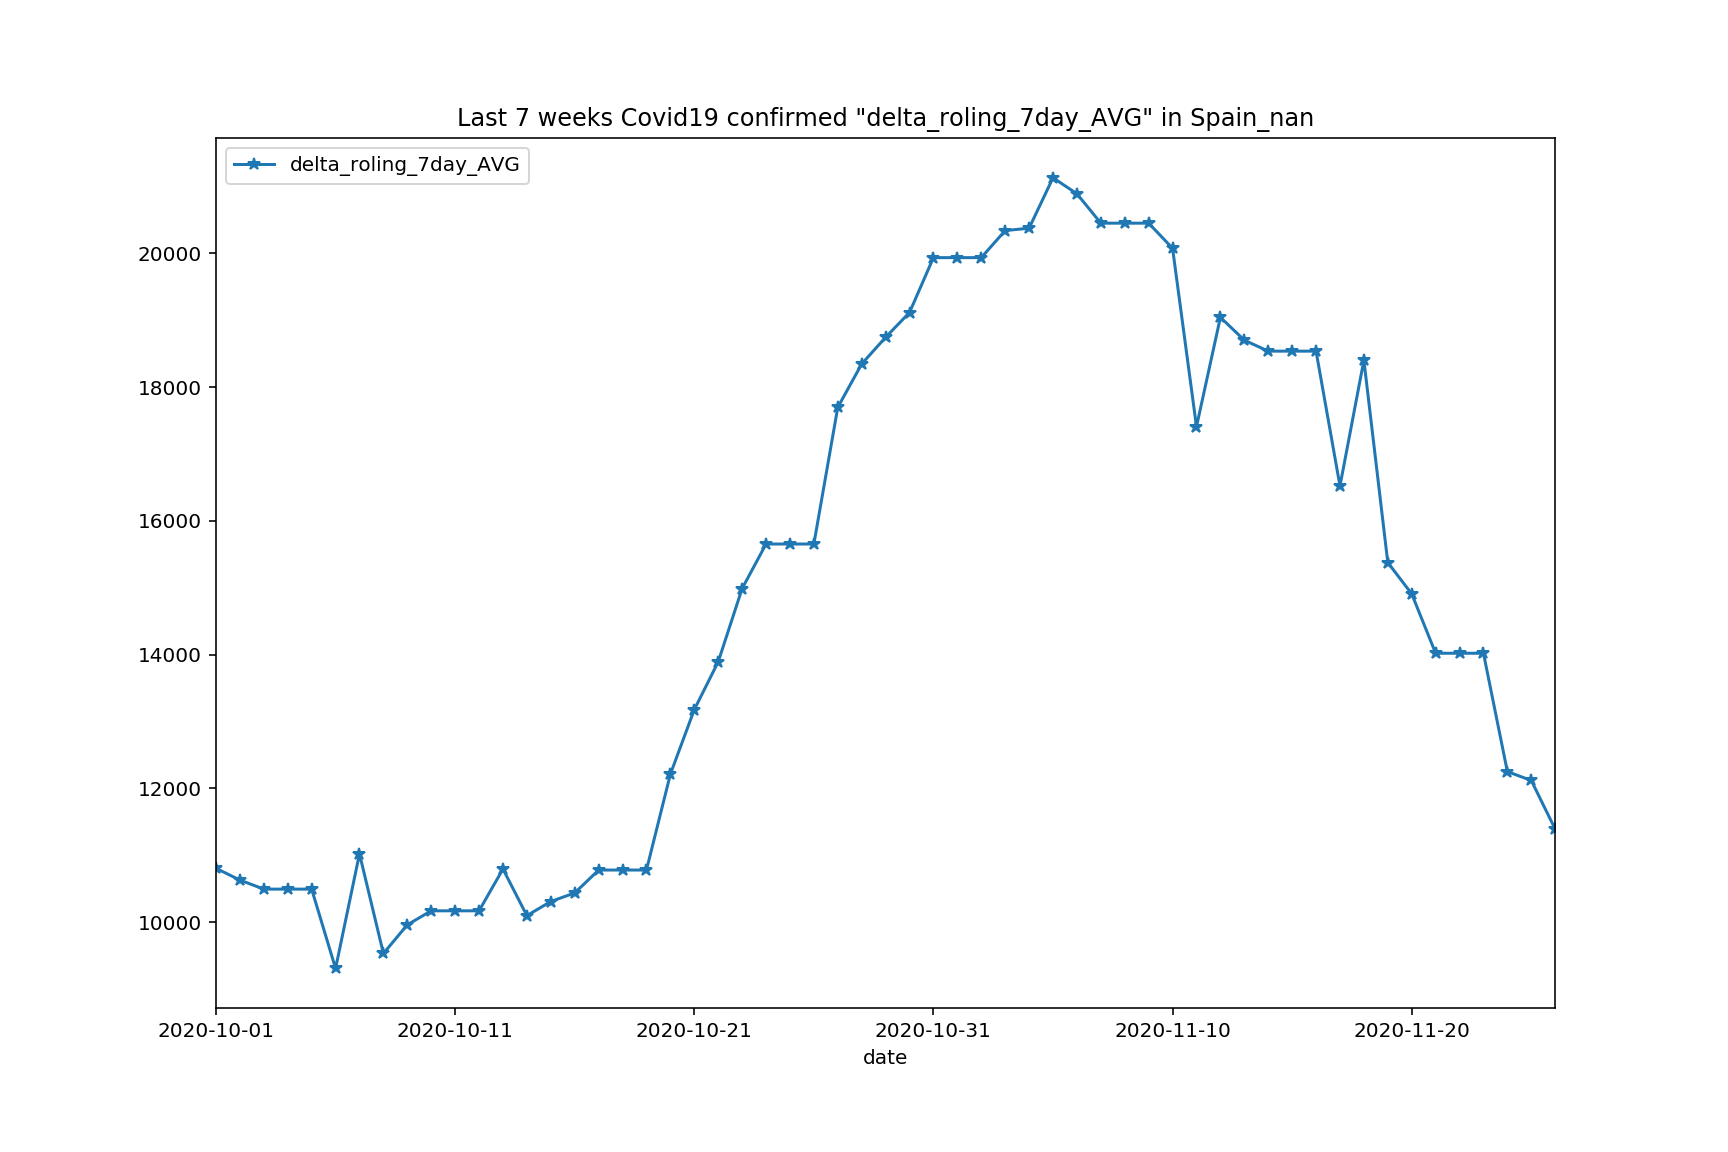

In [50]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


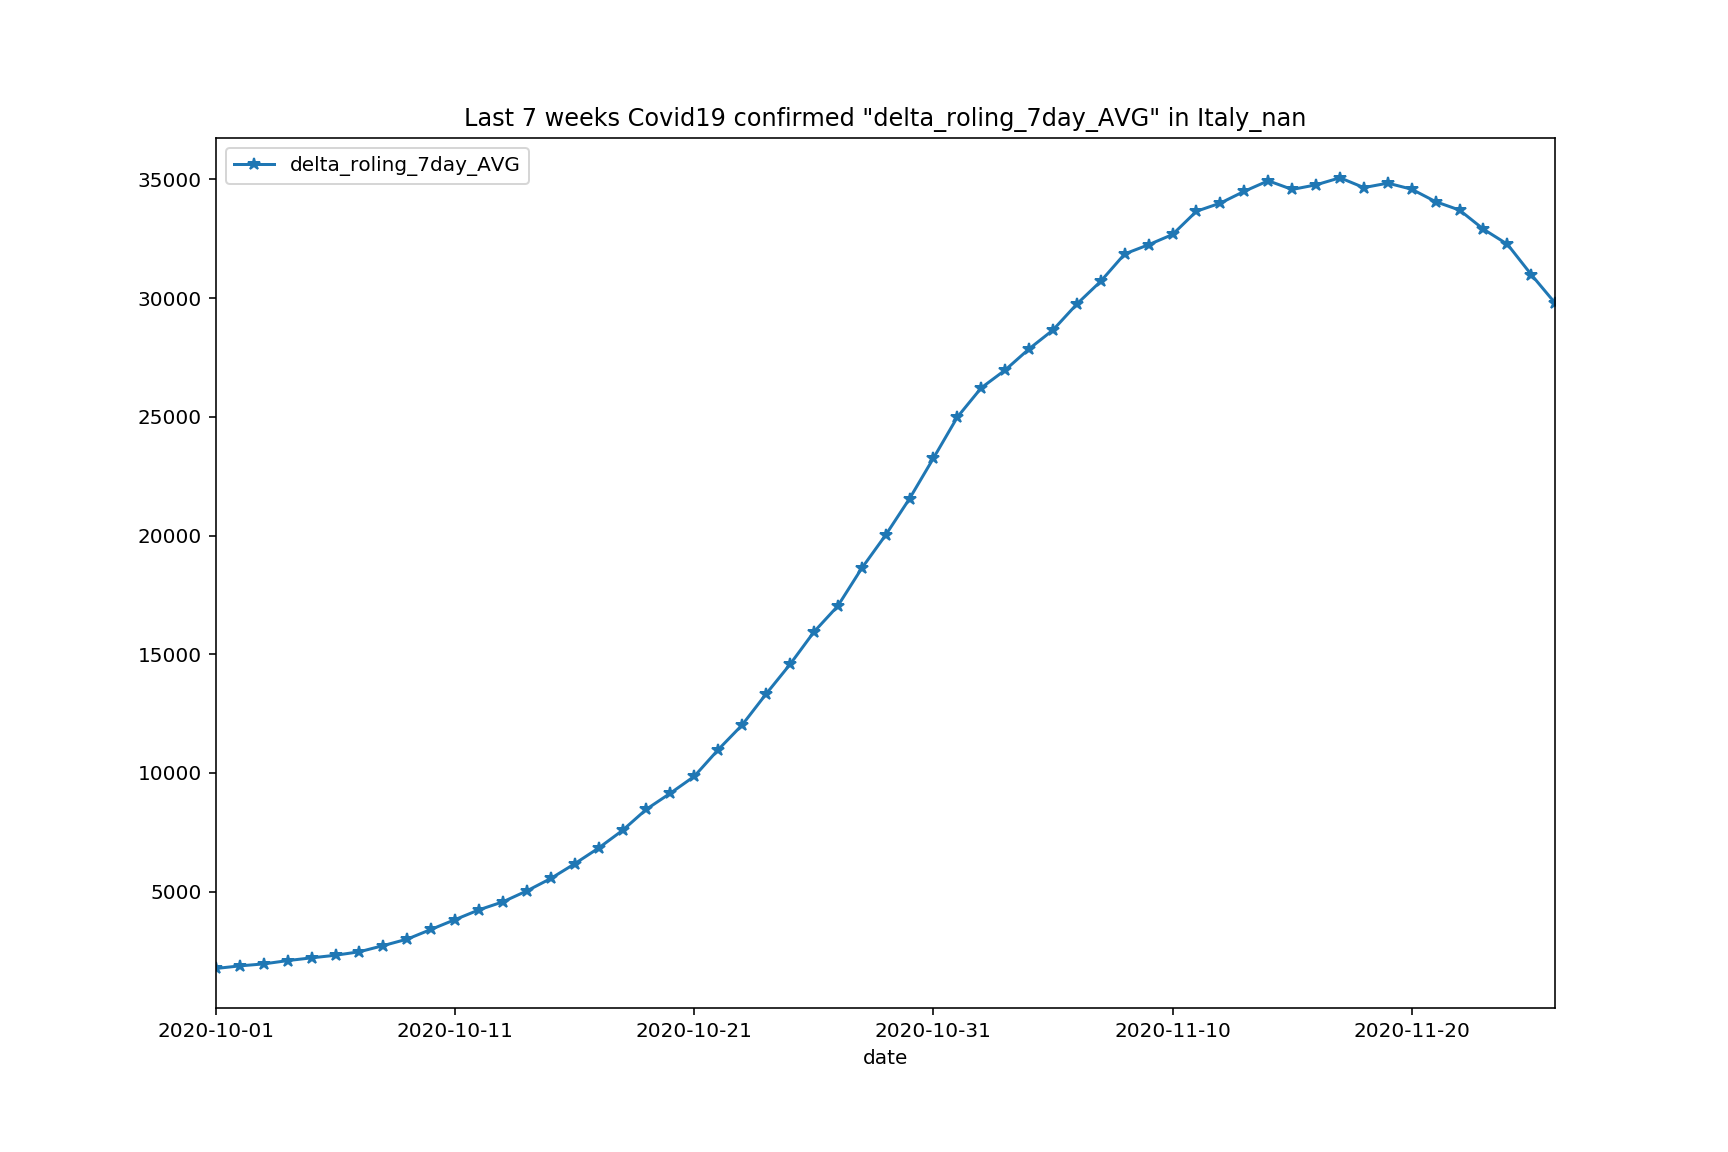

In [51]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


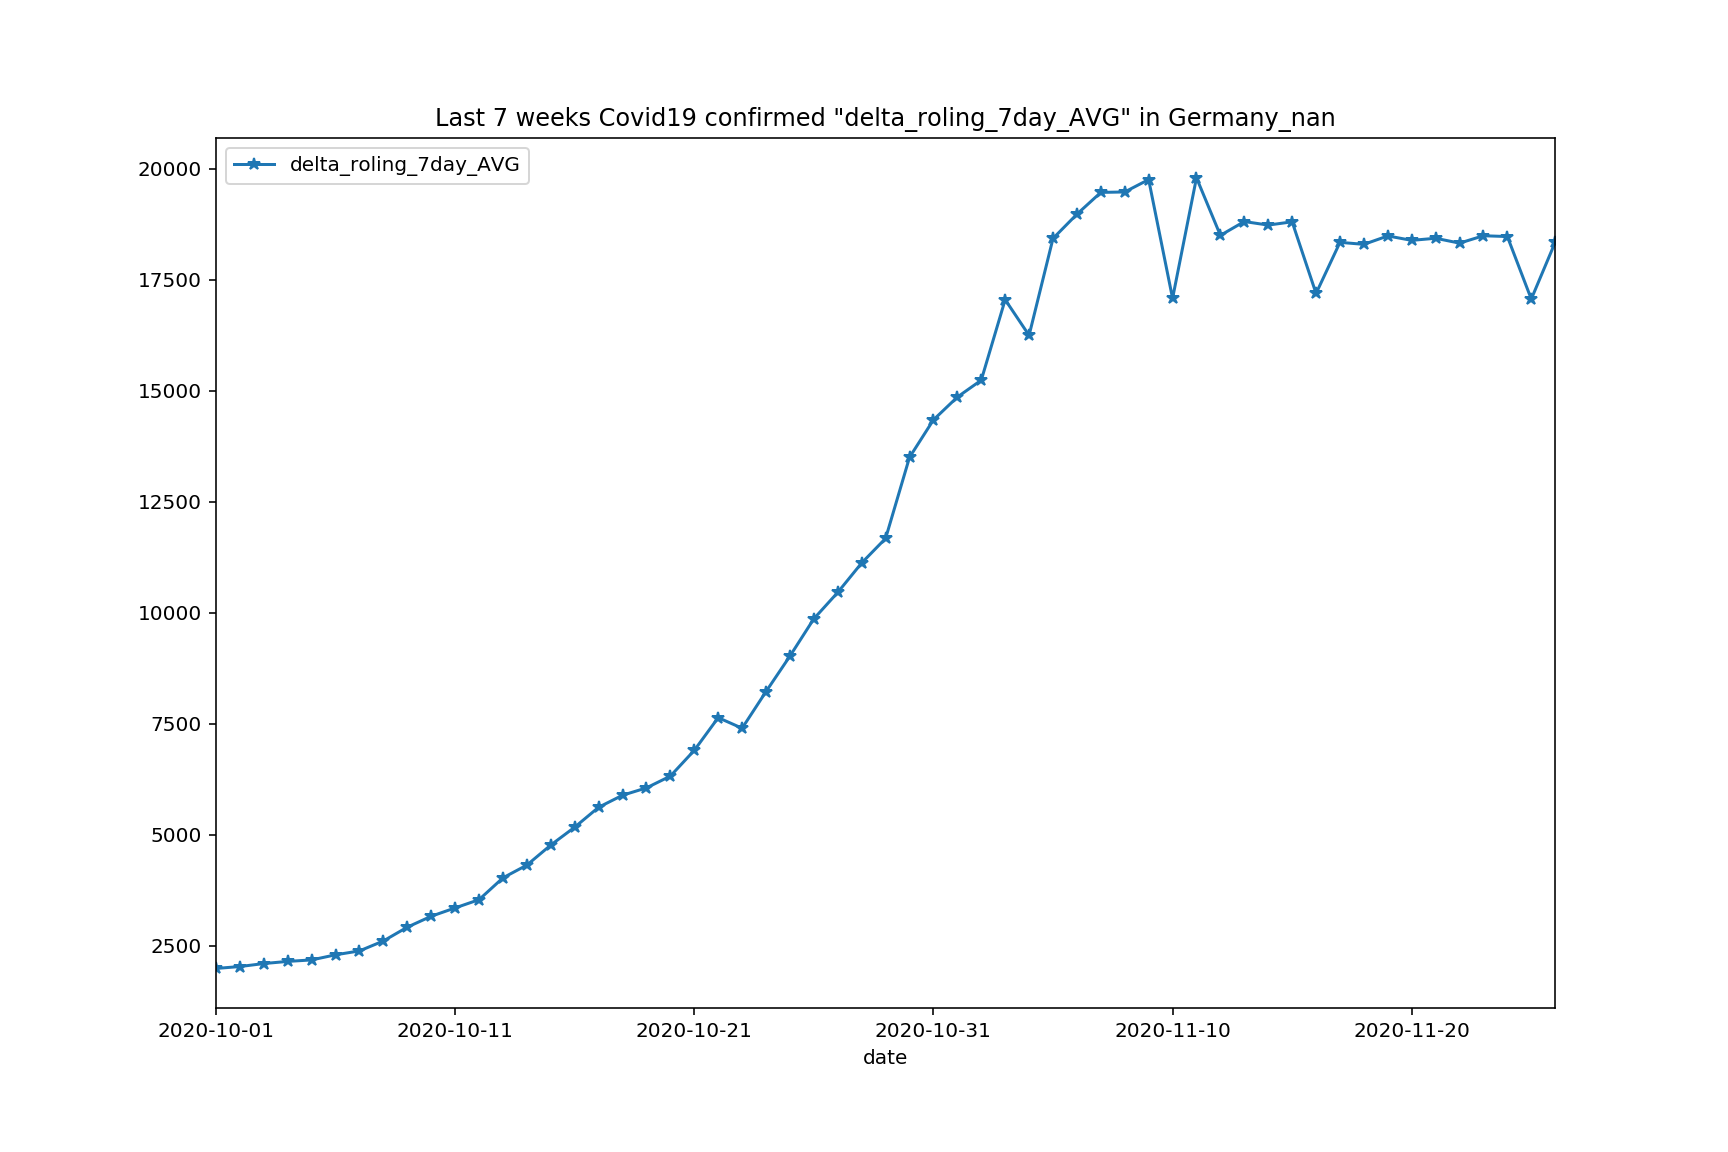

In [52]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


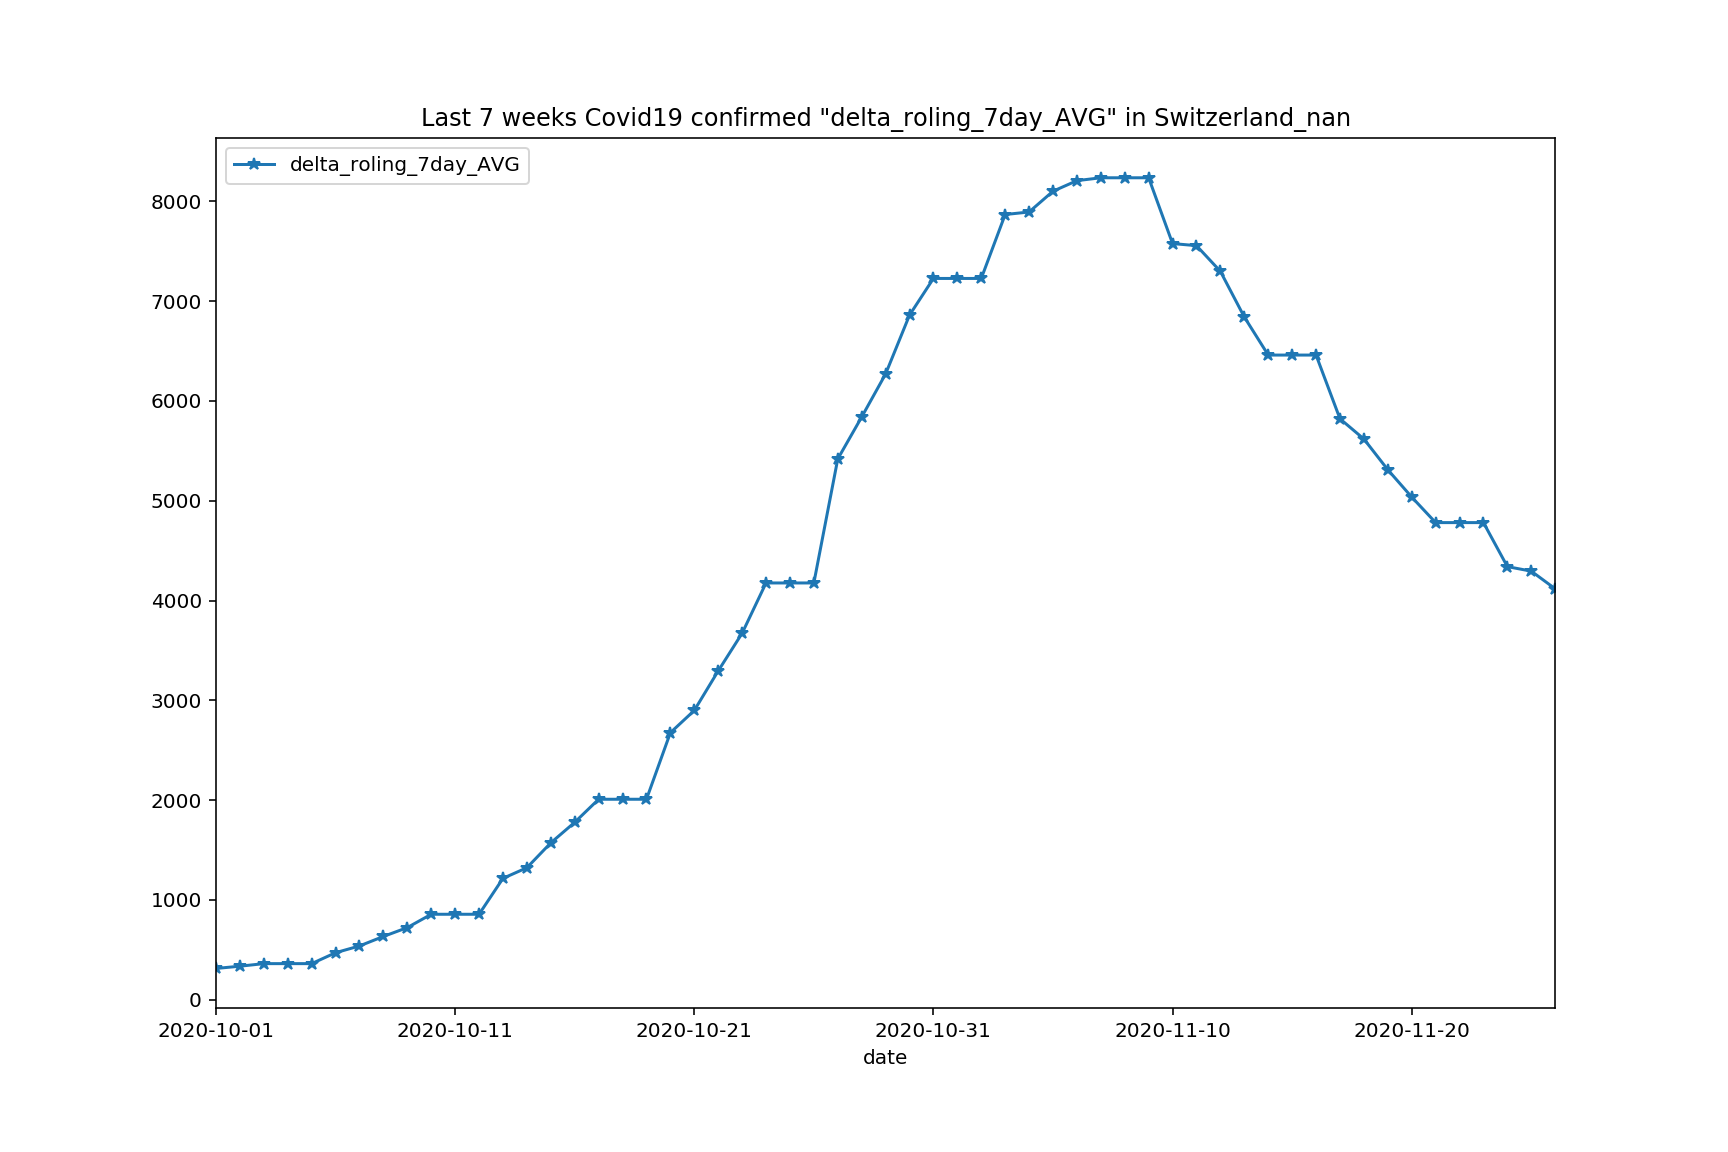

In [53]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


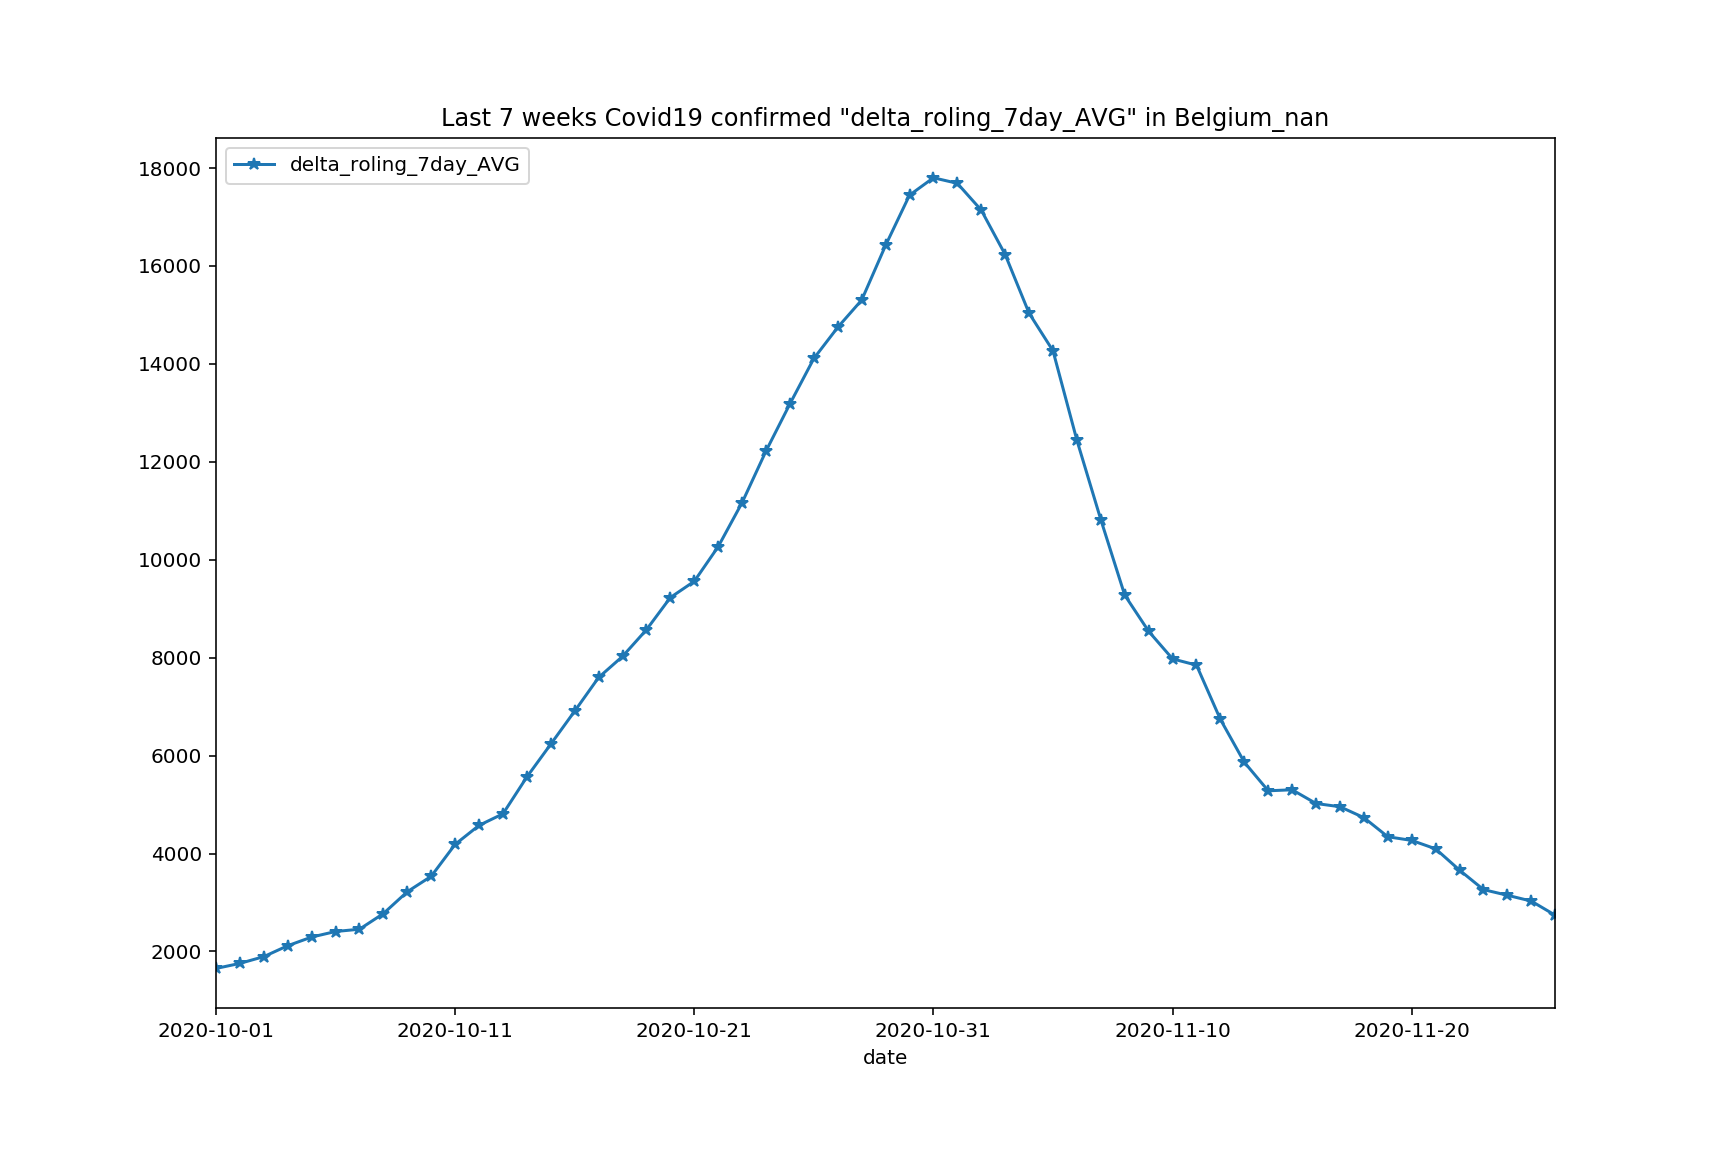

In [54]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


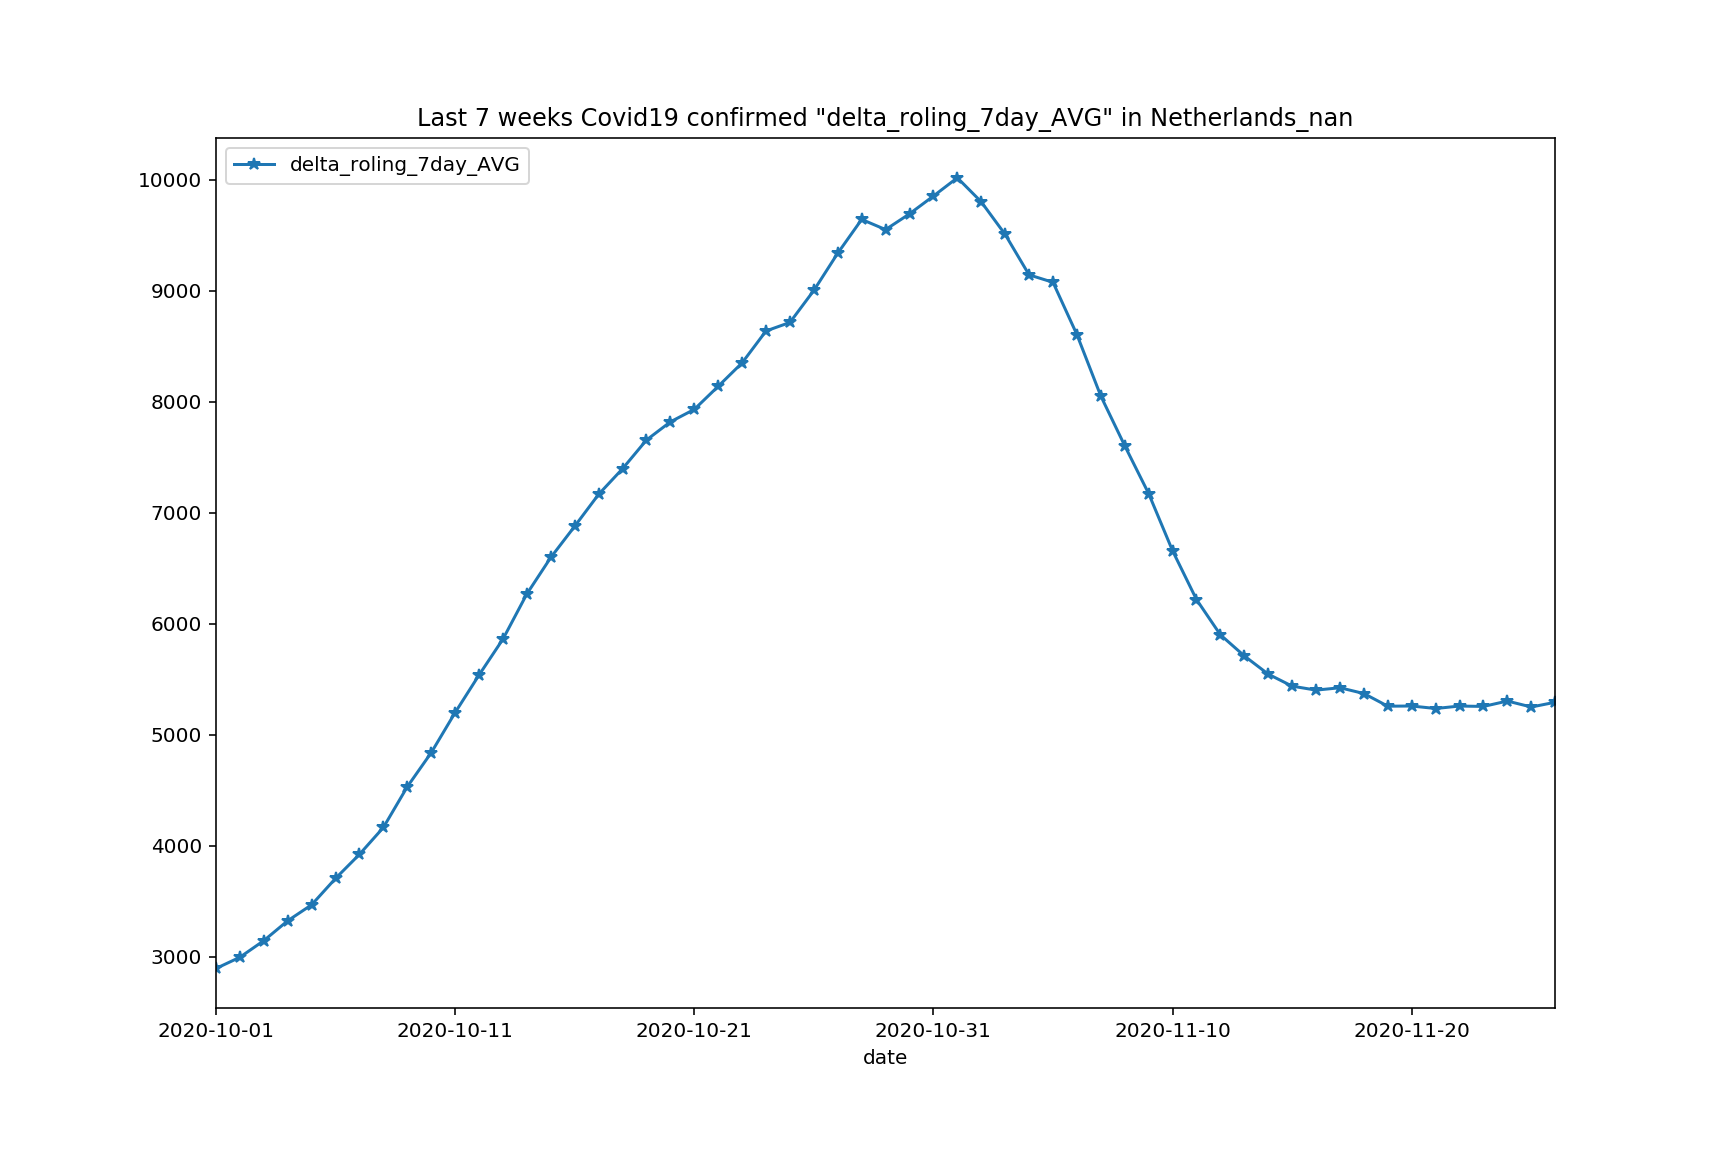

In [55]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


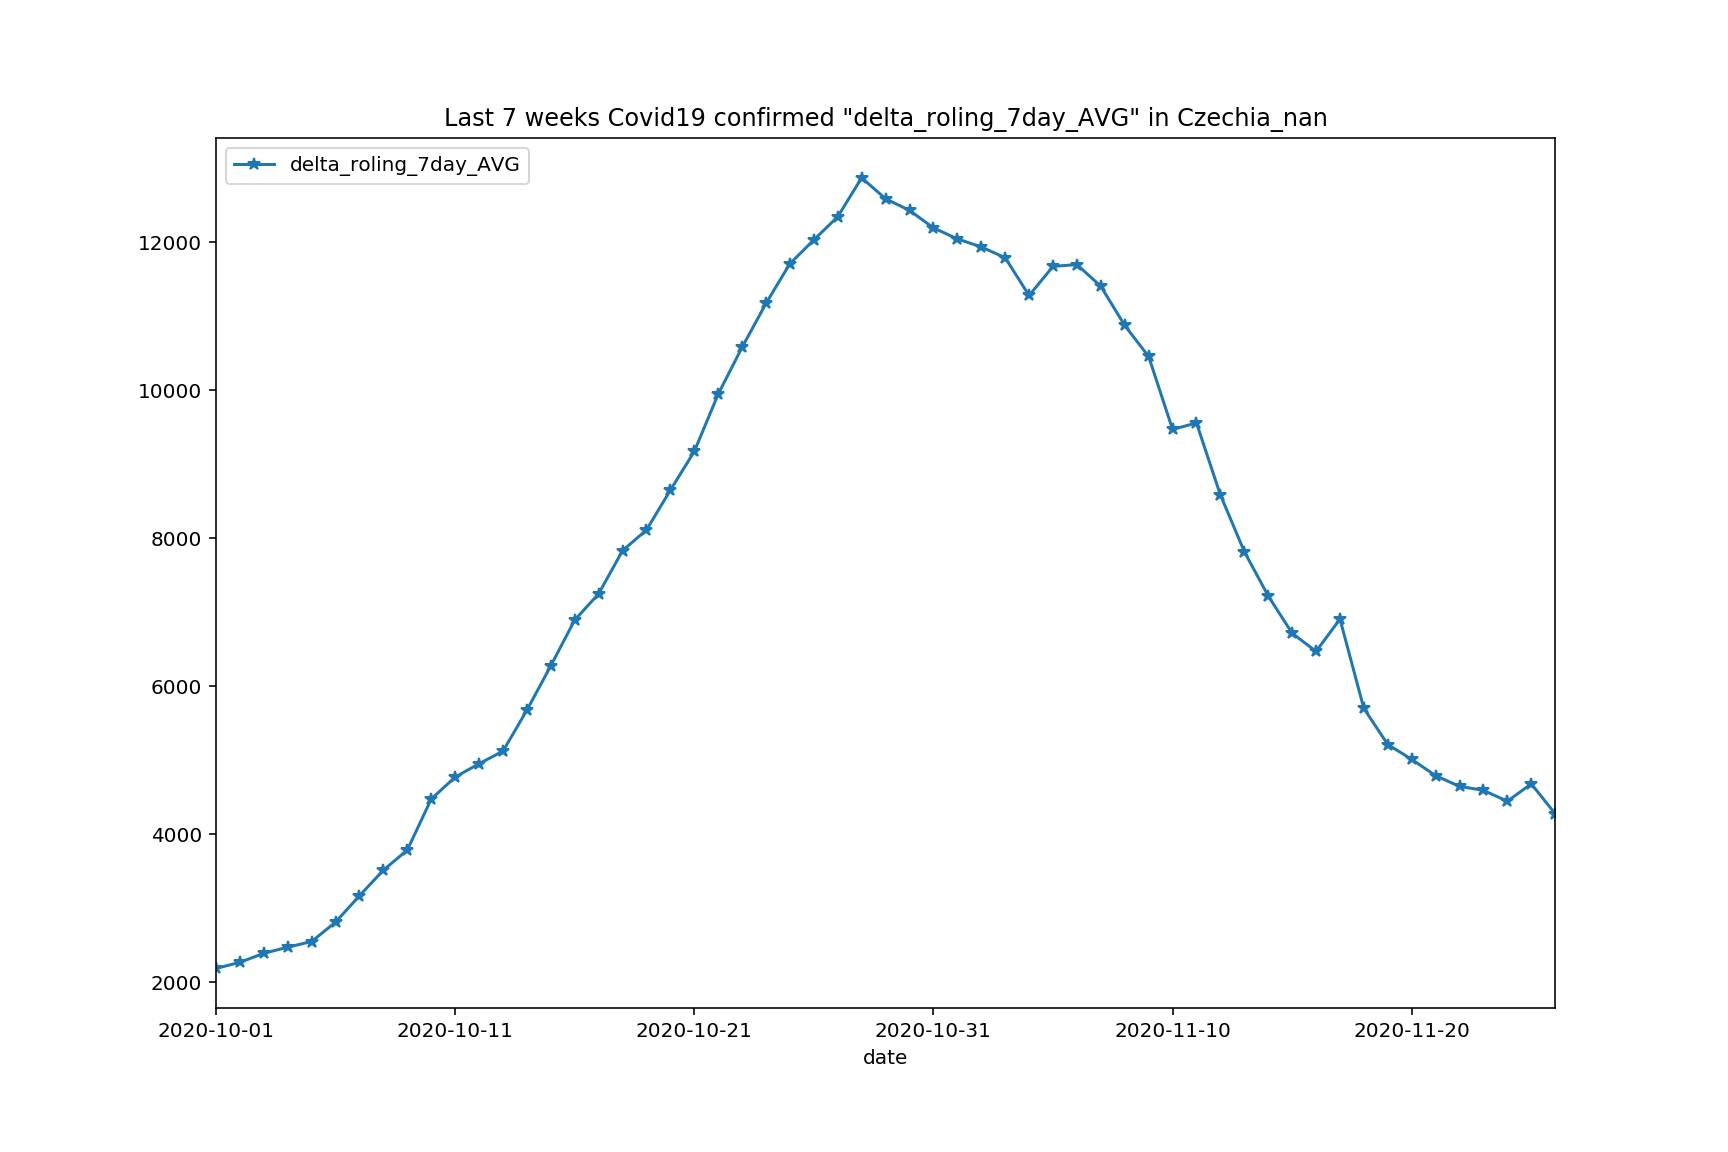

In [56]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


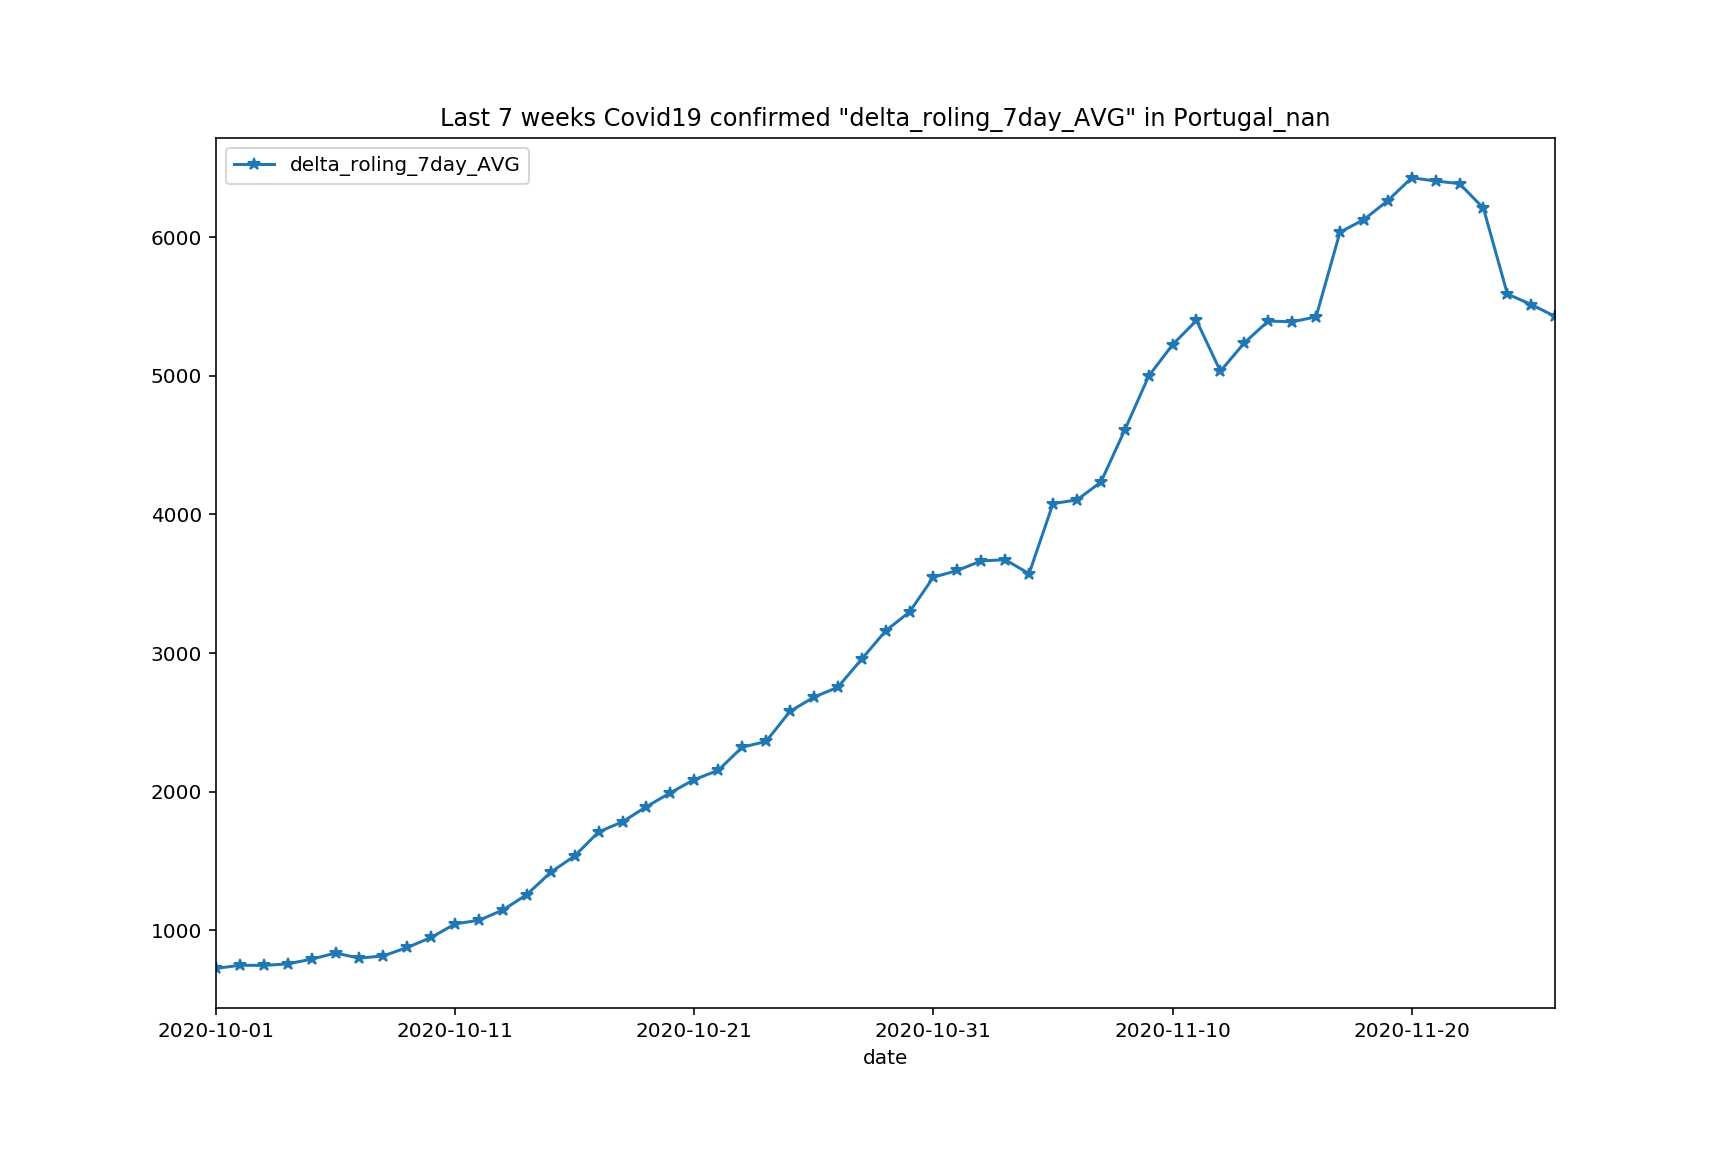

In [57]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [58]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [59]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
